# NYC TLC TRIP RECORD

# Goals

USER: OWNER

Reason: 
* To identify peak passenger demand periods so that we can optimize driver allocation and operational resources.

* To understand customer behavior patterns (day and time preferences) and adjust pricing strategies accordingly.

* To maximize revenue by implementing dynamic pricing especially in high-demand hours and days.

* To improve operational efficiency by reducing idle times and ensuring enough taxis are available during peak traffic.

* To use data-driven insights as a foundation for smarter decision-making and sustainable revenue growth.

# 1 - Import Data and Libraries

In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [4]:
Trip_dataset = pd.read_csv("NYC TLC Trip Record.csv")
Trip_dataset

C:\Users\galih\AppData\Local\Temp\ipykernel_32224\2087575959.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Trip_dataset = pd.read_csv("NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


* kita copy datanya sehingga kita punya backup original file

In [5]:
Trip_dataset_copy = Trip_dataset.copy(deep=True)
Trip_dataset_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [6]:
print(repr(Trip_dataset_copy.columns))

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')


# 2 - Data Cleaning and Data Screening

## Intro
Before moving into the analysis, we need to gain a deeper understanding of our dataset in the data understanding stage. Through this process, we can identify anomalies within the taxi dataset that need to be addressed during the data cleaning stage. Each anomaly-handling action will be accompanied by a justification based on either domain knowledge or statistical reasoning.

In [7]:
Trip_dataset_copy.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


In [8]:
Trip_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

## Dataset Dictionary
This dataset contains detailed information on New York City taxi trips, including pickup and drop-off times, locations, trip distance, fares, payment methods, and various surcharges. It also includes vendor codes, rate types, and trip types. These attributes make the dataset suitable for analyzing travel patterns, driver earnings, passenger behavior, and overall service performance.
Here's the column explanation:

 VendorID = A code indicating the LPEP provider that provided therecord.
 1=CreativeMobileTechnologies,LLC.
 2=VeriFoneInc.

 lpep_pickup_datetime = The date and time when the meter was engaged.

 lpep_dropoff_datetime = The date and time when the meter was disengaged.

 Passenger_count = The number of passengers in the vehicle. This is a driver entered value.

 Trip_distance = The elapsed trip distance in miles was reported by the taxi meter.

 PULocationID = TLC Taxi Zone in which the taximeter was engaged.

 DOLocationID = TLC Taxi Zone in which the taximeter was disengaged.

 RateCodeID = The final rate code is ineffectat the end of the trip.
 1=Standardrate
 2=JFK
 3=Newark
 4=NassauorWestchester
 5=Negotiatedfare
 6=Groupride

 Store_and_fwd_flag = This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka“store and forward, ”because the vehicle did not have a connection to the server.
 Y=store and forward trip
 N=not a store and forward trip

 Payment_type = A numeric code signifying how the passenger paid for the trip.
 1=Credit card
 2=Cash
 3=No charge
 4=Dispute
 5=Unknown
 6=Voided trip

 Fare_amount = The time-and-distance fare is calculated by the meter.Extra Miscellaneous extraas and surcharges.
 Currently, this only includes the $0.50 and $1 rushhour and overnight charges.

 MTA_tax = $0.50 MTA tax that is automatically triggered based on the metered rate in use.

 Improvement_surcharge = $0.30 improvement surcharge assessed on hailed trips at the flag drop.The improvement surcharge began being levied in 2015.
 
 Tip_amount = This field is automatically populated for creditcard tips.Cash tips are not included.

 Tolls_amount = The total amount of all tolls paid in the trip.

 Total_amount = The total amount charged to passengers. Does not include cash tips.

 Trip_type = A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered bythe driver.
 1=Street-hail
 2=Dispatch


In [9]:
Trip_dataset_copy.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [10]:
#Check duplicate
Trip_dataset_copy.duplicated().sum()

np.int64(0)

## Initial Data Understanding

* Dataset Size: The NYC Green Taxi dataset contains 20 columns and 68,211 rows with no duplicate data. This includes trip-level information such as pickup and drop-off timestamps, locations, fares, surcharges, and passenger counts.

* Missing Data: Several columns have missing values. For example, store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type, and congestion_surcharge have fewer than 68,211 non-null entries. In addition, the ehail_fee column contains 0 non-null values, effectively making it an empty column.

* Columns for Consideration: The ehail_fee column, which has no data at all, can be dropped from the analysis because it does not add any value.

* Data Types: Most columns are numeric (float or int), while the pickup and drop-off timestamps are stored as object (string) types. These should be converted to datetime format for time-based analysis.

* Anomalies / Outliers: Some numeric columns show unrealistic values. For example:

    * trip_distance ranges from 0 to 120,098 miles, which is highly unrealistic and indicates outliers or data entry errors.

    * fare_amount includes negative values (minimum –70) and unusually high amounts (maximum 490), which also indicates anomalies.

    * extra, mta_tax, improvement_surcharge, and tip_amount also have negative values that are not logically valid.

    * passenger_count ranges from 0 to 9, where a count of 0 passengers may be invalid and needs review.

* Potential Transformations:

    * Convert date/time columns to datetime format.

    * Filter out extreme or impossible values in trip_distance, fare_amount, and passenger_count.

    * Consider creating derived columns such as trip duration or fare per mile for deeper analysis.

## What we will do:
1. Remove ehail_fee column
2. Check trip_distance and analyze it. whether we need to keep or remove from dataset
3. Check negative fare_amount, extra, mta_tax, improvement_surcharege and tip_amount then analyze it. whether we need to keep or remove from dataset
4. Check the passanger_count which has nan (0) value then analyze it. whether we need to keep or remove from dataset

### 1. Remove columns "enhail_fee"

In [11]:
# Remove columns "ehail_fee"
Trip_dataset_copy.drop(columns=['ehail_fee'],inplace=True)
Trip_dataset_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [12]:
Trip_dataset_copy.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000


In [13]:
Trip_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  improvement_surcharge  68211 non-null  float64
 15  to

In [14]:
Trip_dataset_copy.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

#### Summary:
* The ehail_fee column has been successfully removed from the dataset, leaving 19 columns for further analysis.

### 2. Check the "trip_distance" more than 1.000 miles. Check also the trip_distance vs fare_amount

In [15]:
#Check trip range more than 1000 miles
Trip_dataset_copy[Trip_dataset_copy["trip_distance"]>1000]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1.0,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,1.0,1.0,2.75
64446,2,2023-01-05 08:39:00,2023-01-05 08:58:00,NaN,NaN,193,140,NaN,2555.47,23.68,0.0,0.0,0.49,0.00,1.0,27.92,NaN,NaN,NaN
64558,2,2023-01-05 17:21:00,2023-01-05 17:26:00,NaN,NaN,49,65,NaN,3077.89,12.02,0.0,0.0,4.00,0.00,1.0,17.02,NaN,NaN,NaN
64572,2,2023-01-05 18:07:00,2023-01-05 18:13:00,NaN,NaN,193,193,NaN,2606.52,11.00,0.0,0.0,1.20,0.00,1.0,13.20,NaN,NaN,NaN
64609,2,2023-01-06 07:27:00,2023-01-06 07:30:00,NaN,NaN,41,74,NaN,43392.12,12.02,0.0,0.0,2.60,0.00,1.0,15.62,NaN,NaN,NaN
64947,2,2023-01-08 23:47:00,2023-01-08 23:59:00,NaN,NaN,52,79,NaN,2446.53,23.89,0.0,0.0,4.34,0.00,1.0,31.98,NaN,NaN,NaN
64954,2,2023-01-09 04:28:00,2023-01-09 04:46:00,NaN,NaN,119,20,NaN,2027.31,20.64,0.0,0.0,1.00,0.00,1.0,22.64,NaN,NaN,NaN
65149,2,2023-01-10 15:40:00,2023-01-10 16:24:00,NaN,NaN,26,37,NaN,1082.45,49.80,0.0,0.0,0.95,0.00,1.0,51.75,NaN,NaN,NaN
65194,2,2023-01-11 06:02:00,2023-01-11 06:32:00,NaN,NaN,69,90,NaN,120098.84,46.82,0.0,0.0,2.00,0.00,1.0,52.57,NaN,NaN,NaN
65277,2,2023-01-11 15:00:00,2023-01-11 15:09:00,NaN,NaN,61,61,NaN,2645.65,12.18,0.0,0.0,2.64,0.00,1.0,15.82,NaN,NaN,NaN


In [16]:
Trip_dataset_copy = Trip_dataset_copy[~(Trip_dataset_copy["trip_distance"]>1000)]
Trip_dataset_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [17]:
# check after delete the trip distance >1000
Trip_dataset_copy[Trip_dataset_copy["trip_distance"]>1000]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


next we check top 20 which has the highest total_amount and correlate with trip_distance. then we find the true dataset to find the maximum trip_distance

In [18]:
Trip_dataset_copy.sort_values(by="total_amount",ascending=False).head(20)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
21547,2,2023-01-11 20:52:23,2023-01-11 20:52:33,N,5.0,130,130,1.0,0.00,490.0,0.0,0.0,0.00,0.0,1.0,491.00,2.0,2.0,0.0
46373,2,2023-01-23 20:43:48,2023-01-23 20:43:53,N,5.0,130,130,1.0,0.00,459.9,0.0,0.0,0.00,0.0,1.0,460.90,2.0,2.0,0.0
59442,2,2023-01-29 20:01:58,2023-01-29 20:05:25,N,5.0,92,92,1.0,0.07,455.0,0.0,0.0,0.00,0.0,1.0,456.00,2.0,2.0,0.0
30047,2,2023-01-15 21:57:15,2023-01-15 21:57:20,N,5.0,191,191,1.0,0.00,450.0,0.0,0.0,0.00,0.0,1.0,451.00,2.0,2.0,0.0
42278,2,2023-01-21 19:47:15,2023-01-21 19:51:20,N,5.0,92,92,1.0,0.00,450.0,0.0,0.0,0.00,0.0,1.0,451.00,2.0,2.0,0.0
18474,2,2023-01-10 15:58:15,2023-01-10 15:58:26,N,5.0,92,92,1.0,0.38,440.0,0.0,0.0,0.00,0.0,1.0,441.00,2.0,2.0,0.0
53670,2,2023-01-26 21:26:12,2023-01-26 21:26:17,N,5.0,129,129,1.0,0.00,428.0,0.0,0.0,0.00,0.0,1.0,429.00,2.0,2.0,0.0
50526,2,2023-01-25 17:14:16,2023-01-25 17:21:43,N,5.0,80,37,1.0,0.60,425.0,0.0,0.0,0.00,0.0,1.0,426.00,2.0,2.0,0.0
61656,2,2023-01-30 22:13:19,2023-01-30 22:13:32,N,5.0,82,82,1.0,0.02,399.0,0.0,0.0,0.00,0.0,1.0,400.00,2.0,2.0,0.0
30070,2,2023-01-15 22:37:11,2023-01-15 22:37:14,N,5.0,265,265,3.0,0.00,295.0,0.0,0.0,59.20,0.0,1.0,355.20,1.0,2.0,0.0


* Because rows with extremely high total_amount (more than $399) but less than 1 mile of trip_distance are unrealistic and likely reflect data-entry errors, we decided to remove these anomalies

In [19]:
Trip_dataset_copy = Trip_dataset_copy[~((Trip_dataset_copy["total_amount"]>399)&(Trip_dataset_copy["trip_distance"]<1))]
Trip_dataset_copy.sort_values(by="total_amount",ascending=False).head(30)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
30070,2,2023-01-15 22:37:11,2023-01-15 22:37:14,N,5.0,265,265,3.0,0.00,295.00,0.0,0.0,59.20,0.00,1.0,355.20,1.0,2.0,0.0
12602,2,2023-01-07 15:57:20,2023-01-07 15:57:24,N,5.0,130,130,1.0,0.00,350.00,0.0,0.0,0.00,0.00,1.0,351.00,1.0,2.0,0.0
7731,2,2023-01-05 12:12:49,2023-01-05 19:53:49,N,1.0,223,223,1.0,25.48,348.10,0.0,0.5,0.00,0.00,1.0,349.60,2.0,1.0,0.0
25518,2,2023-01-13 16:51:53,2023-01-13 18:37:48,N,4.0,265,92,2.0,38.24,322.20,2.5,0.0,0.00,21.30,1.0,347.00,2.0,1.0,0.0
44927,2,2023-01-23 10:28:05,2023-01-23 11:33:51,N,4.0,95,265,1.0,47.25,322.90,0.0,0.5,0.00,0.00,1.0,324.40,2.0,1.0,0.0
7906,2,2023-01-05 13:36:05,2023-01-05 13:38:10,N,5.0,92,92,1.0,0.00,300.00,0.0,0.0,0.00,0.00,1.0,301.00,2.0,2.0,0.0
50437,2,2023-01-25 17:24:38,2023-01-25 19:16:52,N,4.0,82,265,5.0,46.29,292.10,2.5,0.5,0.00,0.00,1.0,296.10,2.0,1.0,0.0
556,2,2023-01-01 13:07:46,2023-01-01 19:45:18,N,1.0,223,8,1.0,16.00,292.80,0.0,0.5,0.00,0.00,1.0,294.30,2.0,1.0,0.0
62314,2,2023-01-31 11:26:06,2023-01-31 12:19:14,N,4.0,130,265,1.0,48.19,258.50,0.0,0.5,0.00,0.00,1.0,260.00,2.0,1.0,0.0
50588,2,2023-01-25 18:24:30,2023-01-25 18:28:48,N,1.0,223,223,1.0,0.76,6.50,2.5,0.5,222.22,0.00,1.0,232.72,1.0,1.0,0.0


* check dataset whether it has the trip_distance below than 3 miles but the total_amount more than $100

In [20]:
Trip_dataset_copy[(Trip_dataset_copy["total_amount"]>=100)&(Trip_dataset_copy["trip_distance"]<3)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
104,2,2023-01-01 01:11:01,2023-01-01 01:11:06,N,5.0,179,179,2.0,0.01,190.00,0.0,0.0,0.00,0.00,1.0,191.00,2.0,2.0,0.0
163,2,2023-01-01 01:59:48,2023-01-01 01:59:51,N,5.0,36,36,2.0,0.09,100.00,0.0,0.0,20.06,0.00,0.3,120.36,1.0,2.0,0.0
185,2,2023-01-01 02:09:48,2023-01-01 02:11:34,N,5.0,223,223,1.0,0.00,110.00,0.0,0.0,0.00,0.00,1.0,111.00,2.0,2.0,0.0
1323,2,2023-01-02 02:22:40,2023-01-02 02:24:38,N,5.0,80,80,1.0,0.65,100.00,0.0,0.0,0.00,0.00,1.0,101.00,1.0,2.0,0.0
2014,2,2023-01-02 15:36:45,2023-01-02 20:44:45,N,1.0,223,223,1.0,2.35,218.60,0.0,0.5,0.00,0.00,1.0,220.10,2.0,1.0,0.0
3292,2,2023-01-03 10:23:45,2023-01-03 10:23:48,N,5.0,138,264,1.0,0.00,80.00,0.0,0.0,25.00,0.00,1.0,106.00,1.0,2.0,0.0
4760,2,2023-01-04 01:06:03,2023-01-04 01:07:22,N,5.0,95,264,5.0,0.00,100.00,0.0,0.0,0.00,0.00,1.0,101.00,2.0,2.0,0.0
6885,2,2023-01-04 21:42:47,2023-01-04 21:43:13,N,5.0,36,80,2.0,0.28,90.00,0.0,0.0,18.20,0.00,1.0,109.20,1.0,2.0,0.0
7906,2,2023-01-05 13:36:05,2023-01-05 13:38:10,N,5.0,92,92,1.0,0.00,300.00,0.0,0.0,0.00,0.00,1.0,301.00,2.0,2.0,0.0
11759,2,2023-01-07 03:46:08,2023-01-07 03:46:26,N,5.0,260,260,1.0,0.00,130.00,0.0,0.0,0.00,0.00,1.0,131.00,1.0,2.0,0.0


* Because we cannot control passengers who choose to give large tips to drivers and usually the tip range maximum is 20%, we decided to keep the data if the tip amount accounts for 20% or more of the total payment. 

In [21]:
Trip_dataset_copy["tip_cov_tp"] = (Trip_dataset_copy["tip_amount"])/(Trip_dataset_copy["total_amount"])*100
Trip_dataset_copy[Trip_dataset_copy["tip_cov_tp"]>20]


C:\Users\galih\AppData\Local\Temp\ipykernel_32224\1858214713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trip_dataset_copy["tip_cov_tp"] = (Trip_dataset_copy["tip_amount"])/(Trip_dataset_copy["total_amount"])*100


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
46,2,2023-01-01 00:46:08,2023-01-01 00:59:10,N,1.0,75,143,1.0,3.19,15.60,1.0,0.5,6.26,0.0,1.0,27.11,1.0,1.0,2.75,23.091110
50,2,2023-01-01 00:34:07,2023-01-01 00:50:01,N,1.0,130,196,1.0,4.46,21.20,1.0,0.5,7.11,0.0,1.0,30.81,1.0,1.0,0.00,23.076923
56,2,2023-01-01 00:15:32,2023-01-01 00:23:03,N,1.0,24,239,1.0,1.47,10.00,1.0,0.5,4.58,0.0,1.0,19.83,1.0,1.0,2.75,23.096319
72,2,2023-01-01 01:46:22,2023-01-01 02:04:14,N,1.0,66,195,1.0,2.39,17.00,1.0,0.5,4.88,0.0,1.0,24.38,1.0,1.0,0.00,20.016407
95,2,2023-01-01 01:19:54,2023-01-01 01:23:25,N,1.0,7,179,1.0,0.47,5.80,1.0,0.5,2.49,0.0,1.0,10.79,1.0,1.0,0.00,23.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68046,2,2023-01-30 17:54:00,2023-01-30 17:59:00,NaN,NaN,193,193,NaN,0.90,13.30,0.0,0.0,3.58,0.0,1.0,17.88,NaN,NaN,NaN,20.022371
68058,2,2023-01-30 18:04:00,2023-01-30 18:14:00,NaN,NaN,193,145,NaN,1.65,13.30,0.0,0.0,5.00,0.0,1.0,19.30,NaN,NaN,NaN,25.906736
68139,2,2023-01-31 11:52:00,2023-01-31 12:04:00,NaN,NaN,244,127,NaN,2.53,14.73,0.0,0.0,5.00,0.0,1.0,20.73,NaN,NaN,NaN,24.119633
68157,2,2023-01-31 13:29:00,2023-01-31 13:43:00,NaN,NaN,127,244,NaN,1.80,14.93,0.0,0.0,5.00,0.0,1.0,20.93,NaN,NaN,NaN,23.889154


* After our analysis, we decided to retain the records where trip_distance is less than 3 miles, total_amount is greater than or equal to 100, and the tip accounts for more than 20% of the total payment, as these trips may still represent valid high-fare, short-distance journeys with generous tips.

* Next, examined the relationship between trip_distance and fare_amount to identify records with unusually high or low fares relative to the distance traveled. This review helps determine whether such records represent legitimate trips or anomalies, guiding our decision on whether to retain or remove them from the dataset

In [22]:
Trip_dataset_copy[Trip_dataset_copy["trip_distance"]<1].sort_values(by="fare_amount",ascending=False).head(20)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
12602,2,2023-01-07 15:57:20,2023-01-07 15:57:24,N,5.0,130,130,1.0,0.00,350.00,0.0,0.0,0.00,0.0,1.0,351.00,1.0,2.0,0.0,0.000000
7906,2,2023-01-05 13:36:05,2023-01-05 13:38:10,N,5.0,92,92,1.0,0.00,300.00,0.0,0.0,0.00,0.0,1.0,301.00,2.0,2.0,0.0,0.000000
30070,2,2023-01-15 22:37:11,2023-01-15 22:37:14,N,5.0,265,265,3.0,0.00,295.00,0.0,0.0,59.20,0.0,1.0,355.20,1.0,2.0,0.0,16.666667
17290,2,2023-01-09 22:17:36,2023-01-09 22:17:39,N,5.0,166,166,2.0,0.00,200.00,0.0,0.0,0.00,0.0,1.0,201.00,1.0,2.0,0.0,0.000000
16289,2,2023-01-09 14:31:17,2023-01-09 14:31:44,N,5.0,135,135,1.0,0.00,190.00,0.0,0.0,0.00,0.0,1.0,191.00,1.0,2.0,0.0,0.000000
104,2,2023-01-01 01:11:01,2023-01-01 01:11:06,N,5.0,179,179,2.0,0.01,190.00,0.0,0.0,0.00,0.0,1.0,191.00,2.0,2.0,0.0,0.000000
46277,2,2023-01-23 19:39:50,2023-01-23 19:39:52,N,5.0,1,264,1.0,0.00,180.00,0.0,0.0,19.00,0.0,1.0,200.00,1.0,2.0,0.0,9.500000
11759,2,2023-01-07 03:46:08,2023-01-07 03:46:26,N,5.0,260,260,1.0,0.00,130.00,0.0,0.0,0.00,0.0,1.0,131.00,1.0,2.0,0.0,0.000000
24147,2,2023-01-13 01:24:33,2023-01-13 01:25:03,N,5.0,42,42,3.0,0.00,130.00,0.0,0.0,0.00,0.0,0.3,130.30,2.0,2.0,0.0,0.000000
13627,2,2023-01-07 23:53:29,2023-01-07 23:53:33,N,5.0,179,179,2.0,0.00,120.00,0.0,0.0,0.00,0.0,1.0,121.00,2.0,2.0,0.0,0.000000


In [23]:
Trip_dataset_copy[(Trip_dataset_copy["trip_distance"]<1)&(Trip_dataset_copy["fare_amount"]>10)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,0.0,0.00,20.00,0.0,0.0,0.00,0.0,1.0,21.00,1.0,2.0,0.0,0.000000
104,2,2023-01-01 01:11:01,2023-01-01 01:11:06,N,5.0,179,179,2.0,0.01,190.00,0.0,0.0,0.00,0.0,1.0,191.00,2.0,2.0,0.0,0.000000
147,2,2023-01-01 02:01:43,2023-01-01 02:03:43,N,5.0,179,7,1.0,0.32,25.00,0.0,0.0,6.32,0.0,0.3,31.62,1.0,2.0,0.0,19.987350
154,2,2023-01-01 02:18:16,2023-01-01 02:22:01,N,5.0,152,166,1.0,0.82,15.00,0.0,0.0,3.20,0.0,1.0,19.20,1.0,2.0,0.0,16.666667
163,2,2023-01-01 01:59:48,2023-01-01 01:59:51,N,5.0,36,36,2.0,0.09,100.00,0.0,0.0,20.06,0.0,0.3,120.36,1.0,2.0,0.0,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68179,2,2023-01-31 17:10:00,2023-01-31 17:15:00,NaN,NaN,193,193,NaN,0.91,13.30,0.0,0.0,2.86,0.0,1.0,17.16,NaN,NaN,NaN,16.666667
68193,2,2023-01-31 18:17:00,2023-01-31 18:20:00,NaN,NaN,146,7,NaN,0.45,14.40,0.0,0.0,1.54,0.0,1.0,16.94,NaN,NaN,NaN,9.090909
68194,2,2023-01-31 19:10:00,2023-01-31 19:39:00,NaN,NaN,166,163,NaN,0.00,19.11,0.0,0.0,4.57,0.0,1.0,27.43,NaN,NaN,NaN,16.660591
68196,2,2023-01-31 19:29:00,2023-01-31 19:35:00,NaN,NaN,33,52,NaN,0.98,14.40,0.0,0.0,3.08,0.0,1.0,18.48,NaN,NaN,NaN,16.666667


In [24]:
Trip_dataset_copy[(Trip_dataset_copy["trip_distance"]<1)&(Trip_dataset_copy["fare_amount"]>10)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2959 entries, 99 to 68202
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               2959 non-null   int64  
 1   lpep_pickup_datetime   2959 non-null   object 
 2   lpep_dropoff_datetime  2959 non-null   object 
 3   store_and_fwd_flag     2533 non-null   object 
 4   RatecodeID             2533 non-null   float64
 5   PULocationID           2959 non-null   int64  
 6   DOLocationID           2959 non-null   int64  
 7   passenger_count        2533 non-null   float64
 8   trip_distance          2959 non-null   float64
 9   fare_amount            2959 non-null   float64
 10  extra                  2959 non-null   float64
 11  mta_tax                2959 non-null   float64
 12  tip_amount             2959 non-null   float64
 13  tolls_amount           2959 non-null   float64
 14  improvement_surcharge  2959 non-null   float64
 15  total_a

* After analyzing the data, we concluded that we will delete records where trip_distance is below 1 mile and fare_amount exceeds $10. This decision is based on the average taxi rate of about $4 per mile, with a maximum threshold of $10 per mile set as our cutoff.

In [25]:
Trip_dataset_copy = Trip_dataset_copy[~((Trip_dataset_copy["trip_distance"]<1)&(Trip_dataset_copy["fare_amount"]>10))]
Trip_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65209 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               65209 non-null  int64  
 1   lpep_pickup_datetime   65209 non-null  object 
 2   lpep_dropoff_datetime  65209 non-null  object 
 3   store_and_fwd_flag     61344 non-null  object 
 4   RatecodeID             61344 non-null  float64
 5   PULocationID           65209 non-null  int64  
 6   DOLocationID           65209 non-null  int64  
 7   passenger_count        61344 non-null  float64
 8   trip_distance          65209 non-null  float64
 9   fare_amount            65209 non-null  float64
 10  extra                  65209 non-null  float64
 11  mta_tax                65209 non-null  float64
 12  tip_amount             65209 non-null  float64
 13  tolls_amount           65209 non-null  float64
 14  improvement_surcharge  65209 non-null  float64
 15  total_a

#### Summary:
* The filtered dataset shows several trips with extremely high trip_distance values ranging from about 40,000 miles up to over 120,000 miles. Such distances are far beyond any realistic taxi journey (even the longest road distances in the U.S. are under 1,000 miles), indicating that these records are clear outliers or data entry errors. 

* We also removed all anomalous records where trip_distance was below 1 mile and fare_amount exceeded $10. This decision was guided by the average taxi rate of about $4 per mile, with $10 per mile established as our maximum threshold

### 3.  Check negative fare_amount, extra, mta_tax, tip_amount, improvement_surcarge and total_amount from dataset

In [26]:
Trip_dataset_copy[Trip_dataset_copy["fare_amount"]<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,3.0,1.0,0.0,-0.000000
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,4.0,1.0,0.0,-0.000000
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.60,-1.0,-0.5,0.00,0.0,-1.0,-11.10,3.0,1.0,0.0,-0.000000
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.50,0.0,-0.5,0.00,0.0,-0.3,-5.30,4.0,1.0,0.0,-0.000000
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.70,0.0,-0.5,0.00,0.0,-1.0,-5.20,3.0,1.0,0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,2,2023-01-04 15:11:00,2023-01-04 15:12:00,NaN,NaN,25,25,NaN,0.13,-27.96,0.0,0.0,3.00,0.0,1.0,-23.96,NaN,NaN,NaN,-12.520868
64487,2,2023-01-05 10:51:00,2023-01-05 11:20:00,NaN,NaN,116,151,NaN,2.22,-43.54,0.0,0.0,0.76,0.0,1.0,-41.78,NaN,NaN,NaN,-1.819052
65108,2,2023-01-10 10:00:00,2023-01-10 10:26:00,NaN,NaN,168,159,NaN,3.45,-17.38,0.0,0.0,0.26,0.0,1.0,-16.12,NaN,NaN,NaN,-1.612903
66459,2,2023-01-19 17:48:00,2023-01-19 17:52:00,NaN,NaN,166,166,NaN,0.38,-35.01,0.0,0.0,4.86,0.0,1.0,-29.15,NaN,NaN,NaN,-16.672384


In [27]:
neg_FA = (Trip_dataset_copy["fare_amount"]<0).value_counts()
dataset_len = len(Trip_dataset_copy)
neg_FAPercent = (neg_FA/dataset_len)*100
neg_FAPercent

fare_amount
False    99.730099
True      0.269901
Name: count, dtype: float64

In [28]:
Trip_dataset_copy[Trip_dataset_copy["extra"]<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0,-0.0
5980,2,2023-01-04 16:13:03,2023-01-04 16:15:30,N,1.0,95,95,5.0,0.22,-4.4,-2.5,-0.5,0.0,0.0,-1.0,-8.4,3.0,1.0,0.0,-0.0
6168,2,2023-01-04 17:38:20,2023-01-04 17:39:14,N,1.0,74,74,1.0,0.10,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0,-0.0
6329,2,2023-01-04 17:06:10,2023-01-04 17:11:35,N,1.0,42,74,1.0,0.75,-7.2,-2.5,-0.5,0.0,0.0,-1.0,-11.2,3.0,1.0,0.0,-0.0
6501,2,2023-01-04 18:35:37,2023-01-04 18:36:08,N,1.0,74,74,1.0,0.00,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63240,2,2023-01-31 18:11:43,2023-01-31 18:12:13,N,1.0,193,193,1.0,0.00,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0,-0.0
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0,0.0,-0.0
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0,-0.0
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3.0,1.0,0.0,-0.0


In [29]:
neg_EX = (Trip_dataset_copy["extra"]<0).value_counts()
neg_EXPercent = (neg_EX/dataset_len)*100
neg_EXPercent

extra
False    99.877318
True      0.122682
Name: count, dtype: float64

In [30]:
Trip_dataset_copy[Trip_dataset_copy["mta_tax"]<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,-0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0,-0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0,-0.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4.0,1.0,0.0,-0.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3.0,1.0,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63240,2,2023-01-31 18:11:43,2023-01-31 18:12:13,N,1.0,193,193,1.0,0.00,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0,-0.0
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0,0.0,-0.0
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0,-0.0
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3.0,1.0,0.0,-0.0


In [31]:
neg_MT = (Trip_dataset_copy["mta_tax"]<0).value_counts()
neg_MTPercent = (neg_MT/dataset_len)*100
neg_MTPercent

mta_tax
False    99.746967
True      0.253033
Name: count, dtype: float64

In [32]:
Trip_dataset_copy[Trip_dataset_copy["tip_amount"]<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
3409,2,2023-01-03 11:43:10,2023-01-03 11:43:25,N,1.0,193,193,1.0,0.0,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,3.0,1.0,0.0,16.666667
7793,2,2023-01-05 12:33:18,2023-01-05 12:33:26,N,1.0,193,193,1.0,0.0,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,3.0,1.0,0.0,16.666667
8107,2,2023-01-05 15:23:14,2023-01-05 15:23:27,N,1.0,193,193,1.0,0.0,-3.0,0.0,-0.5,-0.01,0.0,-1.0,-4.51,3.0,1.0,0.0,0.221729
10336,2,2023-01-06 14:54:21,2023-01-06 14:55:50,N,1.0,193,193,1.0,0.0,-3.7,0.0,-0.5,-0.13,0.0,-1.0,-5.33,3.0,1.0,0.0,2.439024
14707,2,2023-01-08 16:49:17,2023-01-08 16:49:20,N,1.0,61,61,1.0,0.0,-3.0,0.0,-0.5,-10.50,0.0,-1.0,-15.00,4.0,1.0,0.0,70.000000
18003,2,2023-01-10 11:30:17,2023-01-10 11:32:09,N,1.0,193,193,1.0,0.0,-3.7,0.0,-0.5,-0.01,0.0,-1.0,-5.21,3.0,1.0,0.0,0.191939
30874,2,2023-01-16 14:03:29,2023-01-16 14:03:56,N,1.0,193,193,1.0,0.0,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,3.0,1.0,0.0,16.666667
37071,2,2023-01-19 14:27:07,2023-01-19 14:27:29,N,1.0,193,193,1.0,0.0,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,3.0,1.0,0.0,16.666667
56495,2,2023-01-28 09:33:22,2023-01-28 09:34:00,N,1.0,193,193,2.0,0.0,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,3.0,1.0,0.0,16.666667


In [33]:
neg_TA = (Trip_dataset_copy["tip_amount"]<0).value_counts()
neg_TAPercent = (neg_TA/dataset_len)*100
neg_TAPercent

tip_amount
False    99.986198
True      0.013802
Name: count, dtype: float64

In [34]:
Trip_dataset_copy[Trip_dataset_copy["improvement_surcharge"]<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,-0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0,-0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0,-0.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4.0,1.0,0.0,-0.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3.0,1.0,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0,0.0,-0.0
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0,-0.0
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3.0,1.0,0.0,-0.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0,0.0,-0.0


In [35]:
neg_IS = (Trip_dataset_copy["improvement_surcharge"]<0).value_counts()
neg_ISPercent = (neg_IS/dataset_len)*100
neg_ISPercent

improvement_surcharge
False    99.733166
True      0.266834
Name: count, dtype: float64

In [36]:
Trip_dataset_copy[Trip_dataset_copy["total_amount"]<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,3.0,1.0,0.0,-0.000000
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,4.0,1.0,0.0,-0.000000
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.60,-1.0,-0.5,0.00,0.0,-1.0,-11.10,3.0,1.0,0.0,-0.000000
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.50,0.0,-0.5,0.00,0.0,-0.3,-5.30,4.0,1.0,0.0,-0.000000
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.70,0.0,-0.5,0.00,0.0,-1.0,-5.20,3.0,1.0,0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,2,2023-01-04 15:11:00,2023-01-04 15:12:00,NaN,NaN,25,25,NaN,0.13,-27.96,0.0,0.0,3.00,0.0,1.0,-23.96,NaN,NaN,NaN,-12.520868
64487,2,2023-01-05 10:51:00,2023-01-05 11:20:00,NaN,NaN,116,151,NaN,2.22,-43.54,0.0,0.0,0.76,0.0,1.0,-41.78,NaN,NaN,NaN,-1.819052
65108,2,2023-01-10 10:00:00,2023-01-10 10:26:00,NaN,NaN,168,159,NaN,3.45,-17.38,0.0,0.0,0.26,0.0,1.0,-16.12,NaN,NaN,NaN,-1.612903
66459,2,2023-01-19 17:48:00,2023-01-19 17:52:00,NaN,NaN,166,166,NaN,0.38,-35.01,0.0,0.0,4.86,0.0,1.0,-29.15,NaN,NaN,NaN,-16.672384


In [37]:
neg_TAm = (Trip_dataset_copy["total_amount"]<0).value_counts()
neg_TAmPercent = (neg_TAm/dataset_len)*100
neg_TAmPercent

total_amount
False    99.725498
True      0.274502
Name: count, dtype: float64

Across several columns (fare_amount, extra, mta_tax, tip_amount, improvement_surcharge, and total_amount), we identified a small proportion of negative or impossible values. For example, the total_amount column alone contains 179 records (≈0.26%) with value below 0, and most of these value overlap across multiple columns with negative values. Because these rows represent a very small fraction of the entire dataset, removing them will not materially change the statistical distribution or affect the representativeness of the analysis. ‘when missing or anomalous data is <5%, it’s generally acceptable to drop them rather than impute.’ - IBM

In [38]:
# select negative column
neg_columns = [
    "fare_amount",
    "extra",
    "mta_tax",
    "tip_amount",
    "improvement_surcharge",
    "total_amount"
]

In [39]:
neg_mask = (Trip_dataset_copy[neg_columns] < 0).any(axis=1)
Trip_dataset_copy[neg_mask]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,3.0,1.0,0.0,-0.000000
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,4.0,1.0,0.0,-0.000000
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.60,-1.0,-0.5,0.00,0.0,-1.0,-11.10,3.0,1.0,0.0,-0.000000
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.50,0.0,-0.5,0.00,0.0,-0.3,-5.30,4.0,1.0,0.0,-0.000000
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.70,0.0,-0.5,0.00,0.0,-1.0,-5.20,3.0,1.0,0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,2,2023-01-04 15:11:00,2023-01-04 15:12:00,NaN,NaN,25,25,NaN,0.13,-27.96,0.0,0.0,3.00,0.0,1.0,-23.96,NaN,NaN,NaN,-12.520868
64487,2,2023-01-05 10:51:00,2023-01-05 11:20:00,NaN,NaN,116,151,NaN,2.22,-43.54,0.0,0.0,0.76,0.0,1.0,-41.78,NaN,NaN,NaN,-1.819052
65108,2,2023-01-10 10:00:00,2023-01-10 10:26:00,NaN,NaN,168,159,NaN,3.45,-17.38,0.0,0.0,0.26,0.0,1.0,-16.12,NaN,NaN,NaN,-1.612903
66459,2,2023-01-19 17:48:00,2023-01-19 17:52:00,NaN,NaN,166,166,NaN,0.38,-35.01,0.0,0.0,4.86,0.0,1.0,-29.15,NaN,NaN,NaN,-16.672384


In [40]:
#remove negative value
Trip_dataset_copy = Trip_dataset_copy.loc[~neg_mask]
Trip_dataset_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,16.666667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,16.666667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,16.666667
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,16.666667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,NaN,NaN,NaN,4.996003
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN,0.000000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN,16.682510
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN,16.684046


#### Summary:
After identifying and removing all rows containing negative values in the selected neg-mask columns (such as: fare_amount, extra, mta_tax, tip_amount, improvement_surcarge and total_amount), the dataset was successfully cleaned. A total of 179 invalid rows were deleted, reducing the dataset to 65,030 records.

### 4. Check the passanger_count which has nan (0) value then analyze it

In [41]:
# Check initial data
Trip_dataset_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,16.666667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,16.666667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,16.666667
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,16.666667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,NaN,NaN,NaN,4.996003
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN,0.000000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN,16.682510
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN,16.684046


In [42]:
VendorIDxPC = (Trip_dataset_copy[Trip_dataset_copy["passenger_count"]<=0].groupby("VendorID").size().reset_index(name="PCxVID_count"))
VendorIDxPC

,VendorID,PCxVID_count
0,1,310
1,2,12


#### Summary:
Since over 99% of the rows have valid passenger_count values and the column remains useful for analysis, we decided to keep the passenger_count column as well as the rows with passenger_count <= 0, as these rows still contain valuable information in other fields.

### 5. Delete fare_amount if 0 and trip distance more than 0

In [43]:
Trip_dataset_copy[(Trip_dataset_copy["fare_amount"]==0)&(Trip_dataset_copy["trip_distance"]>=0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
1581,2,2023-01-02 10:29:51,2023-01-02 10:30:34,N,1.0,264,264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN
2130,2,2023-01-02 15:46:00,2023-01-03 15:45:15,N,1.0,193,193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN
2793,1,2023-01-03 03:50:19,2023-01-03 03:50:19,Y,5.0,129,264,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN
3557,2,2023-01-03 12:39:11,2023-01-03 12:39:19,N,1.0,264,264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN
3674,2,2023-01-03 13:28:25,2023-01-03 13:28:30,N,1.0,193,193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59955,2,2023-01-30 08:58:03,2023-01-30 08:58:32,N,1.0,207,207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN
60098,2,2023-01-30 09:17:49,2023-01-30 09:19:09,N,1.0,207,207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN
60315,1,2023-01-30 11:01:25,2023-01-30 11:04:06,N,5.0,244,244,1.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,NaN
61178,2,2023-01-30 17:44:24,2023-01-30 17:45:18,N,1.0,193,193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN


In [44]:
Trip_dataset_copy = Trip_dataset_copy[~((Trip_dataset_copy["fare_amount"]==0)&(Trip_dataset_copy["trip_distance"]>=0))]
Trip_dataset_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,16.666667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,16.666667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,16.666667
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,16.666667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,NaN,NaN,NaN,4.996003
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN,0.000000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN,16.682510
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN,16.684046


Check after Data evaluation

In [45]:
Trip_dataset_copy.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp
count,64950.000000,61090.000000,64950.000000,64950.000000,61090.000000,64950.000000,64950.000000,64950.000000,64950.000000,64950.000000,64950.000000,64950.000000,64950.000000,61090.000000,61081.000000,61090.000000,64950.000000
mean,1.877829,1.076526,97.667313,138.619954,1.322557,2.807058,16.229591,0.860323,0.583995,2.189164,0.155576,0.957724,21.524733,1.376363,1.012606,0.754215,9.199147
std,0.327486,1.283812,60.281264,76.571185,0.991121,3.773482,11.933787,1.279607,0.361166,3.049208,1.047431,0.167705,14.169490,0.501217,0.111568,1.226830,8.866428
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.210000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.930000,12.800000,0.000000,0.500000,1.760000,0.000000,1.000000,17.800000,1.000000,1.000000,0.000000,9.389671
75%,2.000000,1.000000,122.000000,223.000000,1.000000,3.320000,19.100000,1.000000,0.500000,3.400000,0.000000,1.000000,25.950000,2.000000,1.000000,2.750000,16.666667
max,2.000000,99.000000,265.000000,265.000000,9.000000,579.630000,348.100000,12.500000,1.500000,222.220000,36.050000,1.000000,349.600000,5.000000,2.000000,2.750000,95.693780


In [46]:
Trip_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64950 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               64950 non-null  int64  
 1   lpep_pickup_datetime   64950 non-null  object 
 2   lpep_dropoff_datetime  64950 non-null  object 
 3   store_and_fwd_flag     61090 non-null  object 
 4   RatecodeID             61090 non-null  float64
 5   PULocationID           64950 non-null  int64  
 6   DOLocationID           64950 non-null  int64  
 7   passenger_count        61090 non-null  float64
 8   trip_distance          64950 non-null  float64
 9   fare_amount            64950 non-null  float64
 10  extra                  64950 non-null  float64
 11  mta_tax                64950 non-null  float64
 12  tip_amount             64950 non-null  float64
 13  tolls_amount           64950 non-null  float64
 14  improvement_surcharge  64950 non-null  float64
 15  total_a

### 6. Seperate date and time to individual column

In [47]:
# convert to datetime
Trip_dataset_copy["lpep_pickup_datetime"] = pd.to_datetime(Trip_dataset_copy["lpep_pickup_datetime"])
Trip_dataset_copy["lpep_dropoff_datetime"] = pd.to_datetime(Trip_dataset_copy["lpep_dropoff_datetime"])

C:\Users\galih\AppData\Local\Temp\ipykernel_32224\1872167222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trip_dataset_copy["lpep_pickup_datetime"] = pd.to_datetime(Trip_dataset_copy["lpep_pickup_datetime"])
C:\Users\galih\AppData\Local\Temp\ipykernel_32224\1872167222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trip_dataset_copy["lpep_dropoff_datetime"] = pd.to_datetime(Trip_dataset_copy["lpep_dropoff_datetime"])


In [48]:
Trip_dataset_copy['pickup_date'] = pd.to_datetime(Trip_dataset_copy['lpep_pickup_datetime']).dt.date
Trip_dataset_copy['pickup_time'] = pd.to_datetime(Trip_dataset_copy['lpep_pickup_datetime']).dt.strftime('%H:%M:%S')

Trip_dataset_copy['dropoff_date'] = pd.to_datetime(Trip_dataset_copy["lpep_dropoff_datetime"]).dt.date
Trip_dataset_copy['dropoff_time'] = pd.to_datetime(Trip_dataset_copy['lpep_dropoff_datetime']).dt.strftime('%H:%M:%S')

Trip_dataset_copy

C:\Users\galih\AppData\Local\Temp\ipykernel_32224\3472170446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trip_dataset_copy['pickup_date'] = pd.to_datetime(Trip_dataset_copy['lpep_pickup_datetime']).dt.date
C:\Users\galih\AppData\Local\Temp\ipykernel_32224\3472170446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trip_dataset_copy['pickup_time'] = pd.to_datetime(Trip_dataset_copy['lpep_pickup_datetime']).dt.strftime('%H:%M:%S')
C:\Users\galih\AppData\Local\Temp\ipykernel_32224\3472170446.py:4: S

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,1.0,24.18,1.0,1.0,2.75,16.666667,2023-01-01,00:26:10,2023-01-01,00:37:11
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,1.0,15.84,1.0,1.0,0.00,16.666667,2023-01-01,00:51:03,2023-01-01,00:57:49
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,1.0,11.64,1.0,1.0,0.00,16.666667,2023-01-01,00:35:12,2023-01-01,00:41:32
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.0,10.20,1.0,1.0,0.00,16.666667,2023-01-01,00:13:14,2023-01-01,00:19:03
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.0,8.00,1.0,1.0,0.00,0.000000,2023-01-01,00:33:04,2023-01-01,00:39:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,0.3,25.02,NaN,NaN,NaN,4.996003,2023-01-31,21:56:00,2023-01-31,22:14:00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,1.0,5.41,NaN,NaN,NaN,0.000000,2023-01-31,22:40:00,2023-01-31,22:48:00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,1.0,21.04,NaN,NaN,NaN,16.682510,2023-01-31,23:46:00,2023-02-01,00:02:00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,1.0,19.18,NaN,NaN,NaN,16.684046,2023-01-31,23:01:00,2023-01-31,23:19:00


# 3 - Exploratory Data Analysis (EDA)

## Check Normalisasi

In [49]:
result = {}
for col in Trip_dataset_copy.select_dtypes(include="number").columns:
    stat,p = normaltest(Trip_dataset_copy[col].dropna())
    result[col] = "normal" if p > 0.05 else "not normal"

result

{'VendorID': 'not normal',
 'RatecodeID': 'not normal',
 'PULocationID': 'not normal',
 'DOLocationID': 'not normal',
 'passenger_count': 'not normal',
 'trip_distance': 'not normal',
 'fare_amount': 'not normal',
 'extra': 'not normal',
 'mta_tax': 'not normal',
 'tip_amount': 'not normal',
 'tolls_amount': 'not normal',
 'improvement_surcharge': 'not normal',
 'total_amount': 'not normal',
 'payment_type': 'not normal',
 'trip_type': 'not normal',
 'congestion_surcharge': 'not normal',
 'tip_cov_tp': 'not normal'}

## Check Data Outliers

### Calculate ratio trip distance vs fare amount

In [50]:
numuric_dataset = Trip_dataset_copy.select_dtypes(include=[np.number])
np.isinf(numuric_dataset).sum()

VendorID                 0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
tip_cov_tp               0
dtype: int64

In [51]:
Trip_dataset_copy["Fare/distance"] = (Trip_dataset_copy["fare_amount"])/(Trip_dataset_copy["trip_distance"])
Trip_dataset_copy

C:\Users\galih\AppData\Local\Temp\ipykernel_32224\3120517229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trip_dataset_copy["Fare/distance"] = (Trip_dataset_copy["fare_amount"])/(Trip_dataset_copy["trip_distance"])


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp,pickup_date,pickup_time,dropoff_date,dropoff_time,Fare/distance
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,24.18,1.0,1.0,2.75,16.666667,2023-01-01,00:26:10,2023-01-01,00:37:11,5.775194
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,15.84,1.0,1.0,0.00,16.666667,2023-01-01,00:51:03,2023-01-01,00:57:49,5.911602
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,11.64,1.0,1.0,0.00,16.666667,2023-01-01,00:35:12,2023-01-01,00:41:32,inf
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,10.20,1.0,1.0,0.00,16.666667,2023-01-01,00:13:14,2023-01-01,00:19:03,5.000000
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,8.00,1.0,1.0,0.00,0.000000,2023-01-01,00:33:04,2023-01-01,00:39:02,5.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,25.02,NaN,NaN,NaN,4.996003,2023-01-31,21:56:00,2023-01-31,22:14:00,5.285714
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,5.41,NaN,NaN,NaN,0.000000,2023-01-31,22:40:00,2023-01-31,22:48:00,2.060748
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,21.04,NaN,NaN,NaN,16.682510,2023-01-31,23:46:00,2023-02-01,00:02:00,4.805233
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,19.18,NaN,NaN,NaN,16.684046,2023-01-31,23:01:00,2023-01-31,23:19:00,4.943894


In [52]:
Trip_dataset_copy[np.isinf(Trip_dataset_copy["Fare/distance"])]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp,pickup_date,pickup_time,dropoff_date,dropoff_time,Fare/distance
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.0,7.2,...,11.64,1.0,1.0,0.0,16.666667,2023-01-01,00:35:12,2023-01-01,00:41:32,inf
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,1.0,75,75,1.0,0.0,4.4,...,8.28,1.0,1.0,0.0,16.666667,2023-01-01,00:57:15,2023-01-01,01:00:15,inf
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,1.0,7,7,1.0,0.0,3.0,...,14.50,1.0,1.0,0.0,62.068966,2023-01-01,01:11:13,2023-01-01,01:11:36,inf
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1.0,0.0,3.0,...,26.30,1.0,1.0,0.0,81.749049,2023-01-01,01:52:58,2023-01-01,01:53:00,inf
169,2,2023-01-01 02:50:02,2023-01-01 02:50:27,N,1.0,157,157,1.0,0.0,3.0,...,20.00,1.0,1.0,0.0,76.000000,2023-01-01,02:50:02,2023-01-01,02:50:27,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63813,2,2023-01-31 22:29:03,2023-01-31 22:35:11,N,1.0,95,95,2.0,0.0,7.2,...,9.70,2.0,1.0,0.0,0.000000,2023-01-31,22:29:03,2023-01-31,22:35:11,inf
63833,2,2023-01-31 22:43:19,2023-01-31 22:46:09,N,5.0,130,130,1.0,0.0,10.0,...,11.00,2.0,2.0,0.0,0.000000,2023-01-31,22:43:19,2023-01-31,22:46:09,inf
63869,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.0,10.0,...,11.00,4.0,2.0,0.0,0.000000,2023-01-31,23:44:44,2023-01-31,23:45:15,inf
64210,1,2023-01-03 10:22:52,2023-01-03 10:38:15,NaN,NaN,41,264,NaN,0.0,10.0,...,15.68,NaN,NaN,NaN,9.119898,2023-01-03,10:22:52,2023-01-03,10:38:15,inf


We plan to remove all rows where Fare/distance equals infinity because these records likely represent invalid or incomplete trips. Keeping zero-distance trips can distort analysis, such as average fares per distance or route efficiency. By filtering them out, the dataset will better reflect actual trips and produce more accurate insights.

In [53]:
Trip_dataset_copy['Fare/distance'] = Trip_dataset_copy['Fare/distance'].replace([np.inf, -np.inf], np.nan)
Trip_dataset_copy

C:\Users\galih\AppData\Local\Temp\ipykernel_32224\3252683647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trip_dataset_copy['Fare/distance'] = Trip_dataset_copy['Fare/distance'].replace([np.inf, -np.inf], np.nan)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp,pickup_date,pickup_time,dropoff_date,dropoff_time,Fare/distance
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,24.18,1.0,1.0,2.75,16.666667,2023-01-01,00:26:10,2023-01-01,00:37:11,5.775194
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,15.84,1.0,1.0,0.00,16.666667,2023-01-01,00:51:03,2023-01-01,00:57:49,5.911602
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,11.64,1.0,1.0,0.00,16.666667,2023-01-01,00:35:12,2023-01-01,00:41:32,NaN
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,10.20,1.0,1.0,0.00,16.666667,2023-01-01,00:13:14,2023-01-01,00:19:03,5.000000
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,8.00,1.0,1.0,0.00,0.000000,2023-01-01,00:33:04,2023-01-01,00:39:02,5.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,25.02,NaN,NaN,NaN,4.996003,2023-01-31,21:56:00,2023-01-31,22:14:00,5.285714
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,5.41,NaN,NaN,NaN,0.000000,2023-01-31,22:40:00,2023-01-31,22:48:00,2.060748
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,21.04,NaN,NaN,NaN,16.682510,2023-01-31,23:46:00,2023-02-01,00:02:00,4.805233
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,19.18,NaN,NaN,NaN,16.684046,2023-01-31,23:01:00,2023-01-31,23:19:00,4.943894


In [54]:
Trip_dataset_copy = Trip_dataset_copy.dropna(subset=["Fare/distance"])
Trip_dataset_copy


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp,pickup_date,pickup_time,dropoff_date,dropoff_time,Fare/distance
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,24.18,1.0,1.0,2.75,16.666667,2023-01-01,00:26:10,2023-01-01,00:37:11,5.775194
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,15.84,1.0,1.0,0.00,16.666667,2023-01-01,00:51:03,2023-01-01,00:57:49,5.911602
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,10.20,1.0,1.0,0.00,16.666667,2023-01-01,00:13:14,2023-01-01,00:19:03,5.000000
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,8.00,1.0,1.0,0.00,0.000000,2023-01-01,00:33:04,2023-01-01,00:39:02,5.454545
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,22.95,2.0,1.0,2.75,0.000000,2023-01-01,00:53:31,2023-01-01,01:11:04,6.366906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,25.02,NaN,NaN,NaN,4.996003,2023-01-31,21:56:00,2023-01-31,22:14:00,5.285714
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,5.41,NaN,NaN,NaN,0.000000,2023-01-31,22:40:00,2023-01-31,22:48:00,2.060748
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,21.04,NaN,NaN,NaN,16.682510,2023-01-31,23:46:00,2023-02-01,00:02:00,4.805233
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,19.18,NaN,NaN,NaN,16.684046,2023-01-31,23:01:00,2023-01-31,23:19:00,4.943894


In [55]:
Trip_dataset_copy[np.isinf(Trip_dataset_copy["Fare/distance"])]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp,pickup_date,pickup_time,dropoff_date,dropoff_time,Fare/distance


### Cek Interquartil

In [56]:
q1TDC = Trip_dataset_copy.quantile(0.25,numeric_only=True)
q3TDC = Trip_dataset_copy.quantile(0.75,numeric_only=True)

print(f"q1: \n{q1TDC}  \nq3: \n{q3TDC}")

q1: 
VendorID                  2.000000
RatecodeID                1.000000
PULocationID             74.000000
DOLocationID             74.000000
passenger_count           1.000000
trip_distance             1.250000
fare_amount               9.300000
extra                     0.000000
mta_tax                   0.500000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     1.000000
total_amount             12.950000
payment_type              1.000000
trip_type                 1.000000
congestion_surcharge      0.000000
tip_cov_tp                0.000000
Fare/distance             5.511545
Name: 0.25, dtype: float64  
q3: 
VendorID                   2.000000
RatecodeID                 1.000000
PULocationID             116.000000
DOLocationID             223.000000
passenger_count            1.000000
trip_distance              3.370000
fare_amount               19.800000
extra                      1.000000
mta_tax                    0.500000
tip_amo

* Trip Distance and Fares:

At Q1, the trip distance is 1.25 miles with a fare of $9.30, while at Q3, the trip distance increases to 3.37 miles with a fare of $19.80. This shows that 50% of your rides fall between 1.25 and 3.37 miles, and fares between $9.30 and $19.80.


* Total Amount and Surcharges:

Total amount at Q1 is $12.95 and rises to $26.15 at Q3, reflecting higher distances, tips, and extra charges. Extra charges (like congestion surcharge) appear more frequently at Q3 (2.75) compared to Q1 (0).


* Tips and Payment Types:

Tip amounts increase significantly from $0 at Q1 to $3.41 at Q3, showing that higher-priced rides or longer trips tend to receive higher tips. Payment type shifts from mostly 1 at Q1 to 2 at Q3, suggesting variation in payment methods for larger fares.


* Fare/Distance Metric:

Fare/distance increases from 5.51 at Q1 to 7.89 at Q3, which could mean higher per-mile costs on longer or premium rides, or extra surcharges influencing the ratio.


* Key Takeaway:

The interquartile range reveals that the middle 50% of rides are short-to-medium trips with fares between about $9 and $20, with longer rides not only costing more but also getting higher tips and more surcharges.

In [57]:
numeric_TripDatasetCopy = Trip_dataset_copy.select_dtypes(include='number')
numeric_TripDatasetCopy

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp,Fare/distance
0,2,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,16.666667,5.775194
1,2,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,16.666667,5.911602
3,1,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,16.666667,5.000000
4,1,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,0.000000,5.454545
5,2,1.0,41,262,1.0,2.78,17.70,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,0.000000,6.366906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,NaN,75,186,NaN,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,NaN,NaN,NaN,4.996003,5.285714
68207,2,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN,0.000000,2.060748
68208,2,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN,16.682510,4.805233
68209,2,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN,16.684046,4.943894


In [58]:
q1 = numeric_TripDatasetCopy.quantile(0.25)
q2 = numeric_TripDatasetCopy.quantile(0.5)
q3 = numeric_TripDatasetCopy.quantile(0.75)

In [59]:
IQ_dataset = pd.DataFrame({
    "q1" : q1,
    "q2" : q2,
    "q3" : q3
})

IQ_dataset

,q1,q2,q3
VendorID,2.000000,2.000000,2.000000
RatecodeID,1.000000,1.000000,1.000000
PULocationID,74.000000,75.000000,116.000000
DOLocationID,74.000000,138.000000,223.000000
passenger_count,1.000000,1.000000,1.000000
trip_distance,1.250000,1.960000,3.370000
fare_amount,9.300000,13.190000,19.800000
extra,0.000000,0.000000,1.000000
mta_tax,0.500000,0.500000,0.500000
tip_amount,0.000000,1.820000,3.410000


In [60]:
IQ_dataset["iqr"] = IQ_dataset["q3"] - IQ_dataset["q1"] 
IQ_dataset

,q1,q2,q3,iqr
VendorID,2.000000,2.000000,2.000000,0.000000
RatecodeID,1.000000,1.000000,1.000000,0.000000
PULocationID,74.000000,75.000000,116.000000,42.000000
DOLocationID,74.000000,138.000000,223.000000,149.000000
passenger_count,1.000000,1.000000,1.000000,0.000000
trip_distance,1.250000,1.960000,3.370000,2.120000
fare_amount,9.300000,13.190000,19.800000,10.500000
extra,0.000000,0.000000,1.000000,1.000000
mta_tax,0.500000,0.500000,0.500000,0.000000
tip_amount,0.000000,1.820000,3.410000,3.410000


In [61]:
IQ_dataset["lowBoundIQ"] = (IQ_dataset["q1"]) - (1.5*(IQ_dataset["iqr"]))
IQ_dataset["highBoundIQ"] = (IQ_dataset["q3"]) + (1.5*(IQ_dataset["iqr"]))
IQ_dataset

,q1,q2,q3,iqr,lowBoundIQ,highBoundIQ
VendorID,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
RatecodeID,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
PULocationID,74.000000,75.000000,116.000000,42.000000,11.000000,179.000000
DOLocationID,74.000000,138.000000,223.000000,149.000000,-149.500000,446.500000
passenger_count,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
trip_distance,1.250000,1.960000,3.370000,2.120000,-1.930000,6.550000
fare_amount,9.300000,13.190000,19.800000,10.500000,-6.450000,35.550000
extra,0.000000,0.000000,1.000000,1.000000,-1.500000,2.500000
mta_tax,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000
tip_amount,0.000000,1.820000,3.410000,3.410000,-5.115000,8.525000


The interquartile range (IQR) identifies the spread of the middle 50% of data for each numeric column, and your lowBoundIQ and highBoundIQ columns define the acceptable range before values are considered outliers.

### Create mean, median, mode, min value and max value then add to IQ_dataset

In [62]:
mean_values = numeric_TripDatasetCopy.mean()
median_values = numeric_TripDatasetCopy.median()



In [63]:
IQ_dataset["mean"] = mean_values
IQ_dataset

,q1,q2,q3,iqr,lowBoundIQ,highBoundIQ,mean
VendorID,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.878447
RatecodeID,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.068409
PULocationID,74.000000,75.000000,116.000000,42.000000,11.000000,179.000000,97.380380
DOLocationID,74.000000,138.000000,223.000000,149.000000,-149.500000,446.500000,138.507398
passenger_count,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.325112
trip_distance,1.250000,1.960000,3.370000,2.120000,-1.930000,6.550000,2.854747
fare_amount,9.300000,13.190000,19.800000,10.500000,-6.450000,35.550000,16.413337
extra,0.000000,0.000000,1.000000,1.000000,-1.500000,2.500000,0.864245
mta_tax,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.584005
tip_amount,0.000000,1.820000,3.410000,3.410000,-5.115000,8.525000,2.204112


In [64]:
IQ_dataset["median"] = median_values
IQ_dataset

,q1,q2,q3,iqr,lowBoundIQ,highBoundIQ,mean,median
VendorID,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.878447,2.000000
RatecodeID,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.068409,1.000000
PULocationID,74.000000,75.000000,116.000000,42.000000,11.000000,179.000000,97.380380,75.000000
DOLocationID,74.000000,138.000000,223.000000,149.000000,-149.500000,446.500000,138.507398,138.000000
passenger_count,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.325112,1.000000
trip_distance,1.250000,1.960000,3.370000,2.120000,-1.930000,6.550000,2.854747,1.960000
fare_amount,9.300000,13.190000,19.800000,10.500000,-6.450000,35.550000,16.413337,13.190000
extra,0.000000,0.000000,1.000000,1.000000,-1.500000,2.500000,0.864245,0.000000
mta_tax,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.584005,0.500000
tip_amount,0.000000,1.820000,3.410000,3.410000,-5.115000,8.525000,2.204112,1.820000


at most frequency value for each variabel

In [65]:
most_freq_values = {}
most_freq_counts = {}
for col in Trip_dataset_copy.columns:
    if Trip_dataset_copy[col].notnull().any():
        val_counts = Trip_dataset_copy[col].value_counts(dropna=False)
        most_freq_values[col] = val_counts.idxmax()
        most_freq_counts[col] = val_counts.max()



In [66]:
most_freq_counts

{'VendorID': np.int64(56102),
 'lpep_pickup_datetime': np.int64(3),
 'lpep_dropoff_datetime': np.int64(6),
 'store_and_fwd_flag': np.int64(59763),
 'RatecodeID': np.int64(59087),
 'PULocationID': np.int64(12949),
 'DOLocationID': np.int64(3378),
 'passenger_count': np.int64(50870),
 'trip_distance': np.int64(639),
 'fare_amount': np.int64(3115),
 'extra': np.int64(37139),
 'mta_tax': np.int64(51740),
 'tip_amount': np.int64(25835),
 'tolls_amount': np.int64(62338),
 'improvement_surcharge': np.int64(60046),
 'total_amount': np.int64(823),
 'payment_type': np.int64(38089),
 'trip_type': np.int64(59363),
 'congestion_surcharge': np.int64(43308),
 'tip_cov_tp': np.int64(25835),
 'pickup_date': np.int64(2514),
 'pickup_time': np.int64(15),
 'dropoff_date': np.int64(2526),
 'dropoff_time': np.int64(76),
 'Fare/distance': np.int64(264)}

In [67]:
most_freq_values

{'VendorID': np.int64(2),
 'lpep_pickup_datetime': Timestamp('2023-01-11 19:00:44'),
 'lpep_dropoff_datetime': Timestamp('2023-01-06 00:00:00'),
 'store_and_fwd_flag': 'N',
 'RatecodeID': np.float64(1.0),
 'PULocationID': np.int64(74),
 'DOLocationID': np.int64(75),
 'passenger_count': np.float64(1.0),
 'trip_distance': np.float64(1.4),
 'fare_amount': np.float64(8.6),
 'extra': np.float64(0.0),
 'mta_tax': np.float64(0.5),
 'tip_amount': np.float64(0.0),
 'tolls_amount': np.float64(0.0),
 'improvement_surcharge': np.float64(1.0),
 'total_amount': np.float64(10.8),
 'payment_type': np.float64(1.0),
 'trip_type': np.float64(1.0),
 'congestion_surcharge': np.float64(0.0),
 'tip_cov_tp': np.float64(0.0),
 'pickup_date': datetime.date(2023, 1, 25),
 'pickup_time': '07:54:00',
 'dropoff_date': datetime.date(2023, 1, 25),
 'dropoff_time': '00:00:00',
 'Fare/distance': np.float64(10.0)}

In [68]:
IQ_dataset["mode"] = most_freq_values
IQ_dataset

,q1,q2,q3,iqr,lowBoundIQ,highBoundIQ,mean,median,mode
VendorID,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.878447,2.000000,2
RatecodeID,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.068409,1.000000,1.0
PULocationID,74.000000,75.000000,116.000000,42.000000,11.000000,179.000000,97.380380,75.000000,74
DOLocationID,74.000000,138.000000,223.000000,149.000000,-149.500000,446.500000,138.507398,138.000000,75
passenger_count,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.325112,1.000000,1.0
trip_distance,1.250000,1.960000,3.370000,2.120000,-1.930000,6.550000,2.854747,1.960000,1.4
fare_amount,9.300000,13.190000,19.800000,10.500000,-6.450000,35.550000,16.413337,13.190000,8.6
extra,0.000000,0.000000,1.000000,1.000000,-1.500000,2.500000,0.864245,0.000000,0.0
mta_tax,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.584005,0.500000,0.5
tip_amount,0.000000,1.820000,3.410000,3.410000,-5.115000,8.525000,2.204112,1.820000,0.0


In [69]:
IQ_dataset["mode_counts"] = most_freq_counts
IQ_dataset

,q1,q2,q3,iqr,lowBoundIQ,highBoundIQ,mean,median,mode,mode_counts
VendorID,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.878447,2.000000,2,56102
RatecodeID,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.068409,1.000000,1.0,59087
PULocationID,74.000000,75.000000,116.000000,42.000000,11.000000,179.000000,97.380380,75.000000,74,12949
DOLocationID,74.000000,138.000000,223.000000,149.000000,-149.500000,446.500000,138.507398,138.000000,75,3378
passenger_count,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.325112,1.000000,1.0,50870
trip_distance,1.250000,1.960000,3.370000,2.120000,-1.930000,6.550000,2.854747,1.960000,1.4,639
fare_amount,9.300000,13.190000,19.800000,10.500000,-6.450000,35.550000,16.413337,13.190000,8.6,3115
extra,0.000000,0.000000,1.000000,1.000000,-1.500000,2.500000,0.864245,0.000000,0.0,37139
mta_tax,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.584005,0.500000,0.5,51740
tip_amount,0.000000,1.820000,3.410000,3.410000,-5.115000,8.525000,2.204112,1.820000,0.0,25835


In [70]:
IQ_dataset["min"] = numeric_TripDatasetCopy.min()
IQ_dataset

,q1,q2,q3,iqr,lowBoundIQ,highBoundIQ,mean,median,mode,mode_counts,min
VendorID,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.878447,2.000000,2,56102,1.000000
RatecodeID,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.068409,1.000000,1.0,59087,1.000000
PULocationID,74.000000,75.000000,116.000000,42.000000,11.000000,179.000000,97.380380,75.000000,74,12949,3.000000
DOLocationID,74.000000,138.000000,223.000000,149.000000,-149.500000,446.500000,138.507398,138.000000,75,3378,1.000000
passenger_count,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.325112,1.000000,1.0,50870,0.000000
trip_distance,1.250000,1.960000,3.370000,2.120000,-1.930000,6.550000,2.854747,1.960000,1.4,639,0.010000
fare_amount,9.300000,13.190000,19.800000,10.500000,-6.450000,35.550000,16.413337,13.190000,8.6,3115,0.010000
extra,0.000000,0.000000,1.000000,1.000000,-1.500000,2.500000,0.864245,0.000000,0.0,37139,0.000000
mta_tax,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.584005,0.500000,0.5,51740,0.000000
tip_amount,0.000000,1.820000,3.410000,3.410000,-5.115000,8.525000,2.204112,1.820000,0.0,25835,0.000000


In [71]:
IQ_dataset["max"] = numeric_TripDatasetCopy.max()
IQ_dataset

,q1,q2,q3,iqr,lowBoundIQ,highBoundIQ,mean,median,mode,mode_counts,min,max
VendorID,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.878447,2.000000,2,56102,1.000000,2.00000
RatecodeID,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.068409,1.000000,1.0,59087,1.000000,99.00000
PULocationID,74.000000,75.000000,116.000000,42.000000,11.000000,179.000000,97.380380,75.000000,74,12949,3.000000,265.00000
DOLocationID,74.000000,138.000000,223.000000,149.000000,-149.500000,446.500000,138.507398,138.000000,75,3378,1.000000,265.00000
passenger_count,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.325112,1.000000,1.0,50870,0.000000,8.00000
trip_distance,1.250000,1.960000,3.370000,2.120000,-1.930000,6.550000,2.854747,1.960000,1.4,639,0.010000,579.63000
fare_amount,9.300000,13.190000,19.800000,10.500000,-6.450000,35.550000,16.413337,13.190000,8.6,3115,0.010000,348.10000
extra,0.000000,0.000000,1.000000,1.000000,-1.500000,2.500000,0.864245,0.000000,0.0,37139,0.000000,12.50000
mta_tax,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.584005,0.500000,0.5,51740,0.000000,1.50000
tip_amount,0.000000,1.820000,3.410000,3.410000,-5.115000,8.525000,2.204112,1.820000,0.0,25835,0.000000,222.22000


In [72]:
Trip_dataset_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp,pickup_date,pickup_time,dropoff_date,dropoff_time,Fare/distance
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,24.18,1.0,1.0,2.75,16.666667,2023-01-01,00:26:10,2023-01-01,00:37:11,5.775194
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,15.84,1.0,1.0,0.00,16.666667,2023-01-01,00:51:03,2023-01-01,00:57:49,5.911602
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,10.20,1.0,1.0,0.00,16.666667,2023-01-01,00:13:14,2023-01-01,00:19:03,5.000000
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,8.00,1.0,1.0,0.00,0.000000,2023-01-01,00:33:04,2023-01-01,00:39:02,5.454545
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,22.95,2.0,1.0,2.75,0.000000,2023-01-01,00:53:31,2023-01-01,01:11:04,6.366906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,25.02,NaN,NaN,NaN,4.996003,2023-01-31,21:56:00,2023-01-31,22:14:00,5.285714
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,5.41,NaN,NaN,NaN,0.000000,2023-01-31,22:40:00,2023-01-31,22:48:00,2.060748
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,21.04,NaN,NaN,NaN,16.682510,2023-01-31,23:46:00,2023-02-01,00:02:00,4.805233
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,19.18,NaN,NaN,NaN,16.684046,2023-01-31,23:01:00,2023-01-31,23:19:00,4.943894


### Export correlation data for each variable

In [73]:
corr_matrix = Trip_dataset_copy.corr(numeric_only=True)
corr_matrix

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp,Fare/distance
VendorID,1.000000,-0.021027,0.009112,-0.008124,0.075168,0.017764,0.055056,-0.183567,-0.924546,0.029028,0.018358,-0.076063,0.052896,-0.021659,0.026940,-0.021621,0.006096,0.023518
RatecodeID,-0.021027,1.000000,0.022032,0.003089,-0.001670,0.082510,0.077769,-0.028977,-0.037833,0.007263,0.032810,-0.018529,0.063880,-0.006696,0.902993,-0.020095,-0.025144,0.031575
PULocationID,0.009112,0.022032,1.000000,0.066560,0.016522,0.096231,0.113877,0.023020,-0.032898,0.030818,0.034458,0.023090,0.101297,0.043899,0.035039,-0.070797,-0.026182,-0.008371
DOLocationID,-0.008124,0.003089,0.066560,1.000000,0.001664,0.073578,0.105233,0.071677,0.002489,0.122836,0.001926,-0.012208,0.153090,-0.108887,0.005170,0.436880,0.098168,-0.031033
passenger_count,0.075168,-0.001670,0.016522,0.001664,1.000000,0.013073,0.018005,-0.010352,-0.074115,0.023082,0.009467,0.036662,0.023261,-0.021245,0.006314,0.018385,0.014039,-0.001373
trip_distance,0.017764,0.082510,0.096231,0.073578,0.013073,1.000000,0.687734,0.021035,-0.081278,0.278615,0.314312,0.003739,0.673202,-0.027065,0.100288,0.178668,-0.003671,-0.096035
fare_amount,0.055056,0.077769,0.113877,0.105233,0.018005,0.687734,1.000000,0.010672,-0.134244,0.372980,0.371202,0.028550,0.964521,-0.023733,0.127310,0.191641,-0.011803,-0.098340
extra,-0.183567,-0.028977,0.023020,0.071677,-0.010352,0.021035,0.010672,1.000000,0.230255,0.095071,0.075570,0.048542,0.119564,-0.088866,-0.055860,0.077486,0.051284,-0.022370
mta_tax,-0.924546,-0.037833,-0.032898,0.002489,-0.074115,-0.081278,-0.134244,0.230255,1.000000,-0.072020,-0.062882,0.078647,-0.124425,0.020077,-0.188188,0.027348,-0.020144,-0.028111
tip_amount,0.029028,0.007263,0.030818,0.122836,0.023082,0.278615,0.372980,0.095071,-0.072020,1.000000,0.219014,0.012830,0.571518,-0.533309,0.026510,0.266456,0.719976,-0.054766


In [74]:
# Reset index so row variable becomes a column
corr_df = corr_matrix.reset_index().rename(columns={'index': 'Variable_X'})

# Melt (pivot) from wide to long
corr_long = corr_df.melt(
    id_vars='Variable_X',       # keep Variable_X as row names
    var_name='Variable_Y',      # new column for column variable
    value_name='Correlation'    # correlation value
)

# Save to CSV for Tableau
corr_long.to_excel('correlation_matrix_longmelt.xlsx',index=False)

corr_long

,Variable_X,Variable_Y,Correlation
0,VendorID,VendorID,1.000000
1,RatecodeID,VendorID,-0.021027
2,PULocationID,VendorID,0.009112
3,DOLocationID,VendorID,-0.008124
4,passenger_count,VendorID,0.075168
...,...,...,...
319,payment_type,Fare/distance,0.057904
320,trip_type,Fare/distance,0.098925
321,congestion_surcharge,Fare/distance,-0.060103
322,tip_cov_tp,Fare/distance,-0.033792


In [75]:
#export clean dataset
Trip_dataset_copy.to_csv("trip_dataset_final_rev6.csv",sep=";",decimal=",",index=False)

#export IQ_dataset
IQ_dataset.to_csv("IQ_dataset_Final.csv",sep=";",decimal=",",index=False)

#export correlation matrix
corr_matrix.to_csv("correlation_matrix_capstone2.csv",sep=";",decimal=",",index=False)

### Summary


1️⃣ Central Tendency (Mean, Median, Mode)

Most numeric variables show similar mean and median (e.g., passenger_count, trip_distance, fare_amount), suggesting relatively symmetric distributions. For categorical-coded variables like VendorID and payment_type, the mode dominates (VendorID=2, payment_type=1), meaning these are the most frequent values.

2️⃣ Range and Variability (Min, Max, IQR)

Some columns have very wide ranges:

trip_distance (0.01–579 miles)

fare_amount (0.01–348)

tip_amount (0–222)
This indicates the presence of extreme trips or data entry anomalies. The IQR columns (q3–q1) clearly highlight which variables have larger variability (like PUlocationID, trip_distance, fare_amount).

3️⃣ Outlier Bounds (lowBoundIQ & highBoundIQ)

The lowBoundIQ and highBoundIQ columns show acceptable ranges based on the interquartile rule. For instance, fare_amount outliers are below –6.45 or above 35.55, and trip_distance outliers are above 6.55 miles. This can be used as thresholds for cleaning extreme values.

4️⃣ Distribution Patterns

Most monetary columns (fare_amount, tip_amount, total_amount) have low Q1 values but high maximums, suggesting a skewed distribution with a few very high records. extra, mta_tax, and improvement_surcharge have almost constant values at 0 or 1, indicating fixed fees.

5️⃣ Key Takeaway

This table combines descriptive statistics and interquartile bounds to give a powerful overview. It helps quickly detect anomalies, understand the spread, and plan data cleaning steps such as removing or capping outliers for more reliable analysis.

## Data Analysis

### 1. Check the relationship fare_amount and trip_distance

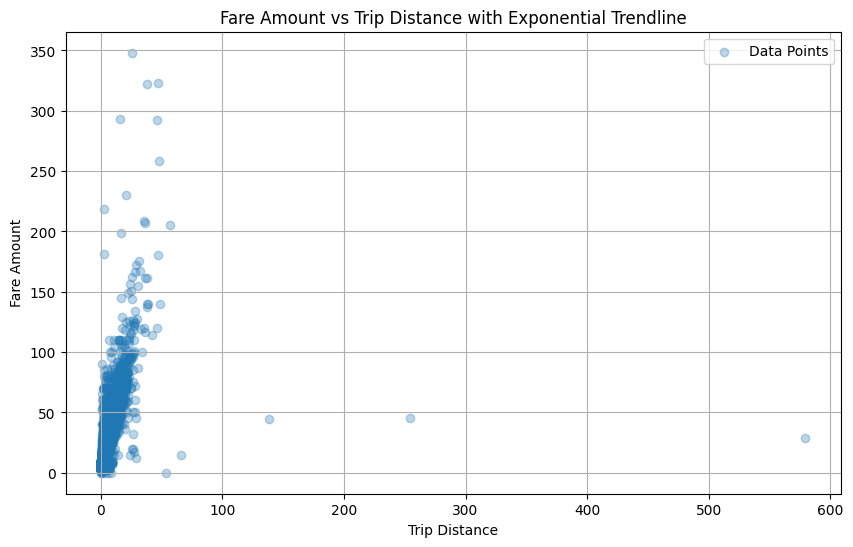

In [76]:
# X and Y data
x = Trip_dataset_copy['trip_distance']
y = Trip_dataset_copy['fare_amount']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.3, label='Data Points')

# Add titles and labels
plt.title('Fare Amount vs Trip Distance with Exponential Trendline')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.legend()
plt.show()

We decided to remove all trip records with distances greater than 100 miles from the dataset, as these values represent unrealistic outliers and could distort the analysis

In [77]:
Trip_dataset_copy[Trip_dataset_copy["trip_distance"]>100]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp,pickup_date,pickup_time,dropoff_date,dropoff_time,Fare/distance
63995,2,2023-01-01 12:35:00,2023-01-01 12:58:00,NaN,NaN,181,137,NaN,579.63,28.49,...,37.08,NaN,NaN,NaN,13.052859,2023-01-01,12:35:00,2023-01-01,12:58:00,0.049152
64695,2,2023-01-06 14:16:00,2023-01-06 14:59:00,NaN,NaN,82,130,NaN,137.95,44.90,...,49.94,NaN,NaN,NaN,8.089708,2023-01-06,14:16:00,2023-01-06,14:59:00,0.325480
66580,2,2023-01-20 09:16:00,2023-01-20 09:59:00,NaN,NaN,133,90,NaN,254.65,45.44,...,55.74,NaN,NaN,NaN,0.000000,2023-01-20,09:16:00,2023-01-20,09:59:00,0.178441


In [78]:
Trip_dataset_copy = Trip_dataset_copy[~(Trip_dataset_copy["trip_distance"]>100)]
Trip_dataset_copy[Trip_dataset_copy["trip_distance"]>100]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,tip_cov_tp,pickup_date,pickup_time,dropoff_date,dropoff_time,Fare/distance


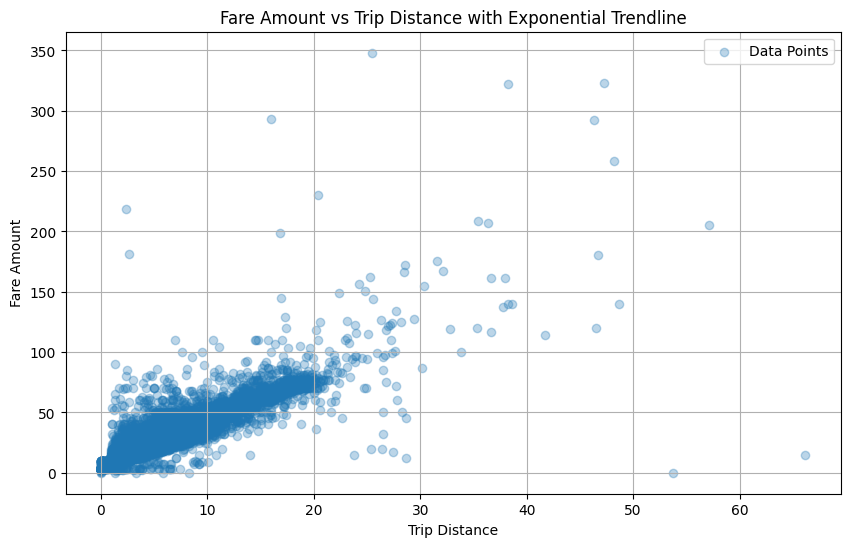

In [79]:
# X and Y data
x = Trip_dataset_copy['trip_distance']
y = Trip_dataset_copy['fare_amount']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.3, label='Data Points')

# Add titles and labels
plt.title('Fare Amount vs Trip Distance with Exponential Trendline')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.legend()
plt.show()

To better understand the relationship between fare amount and trip distance, we tested both linear and exponential trend lines on the dataset. This comparison helps us identify which model provides the most accurate representation of customer payment behavior. The chosen trend line will then be used as a predictive tool to estimate how much customers are likely to pay for trips at different distances, enabling more precise pricing strategies and revenue optimization.

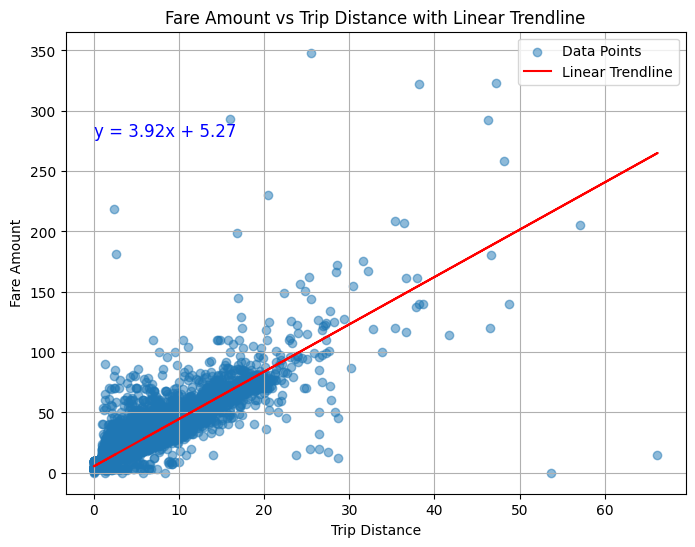

In [80]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Trip_dataset_copy['trip_distance'], Trip_dataset_copy['fare_amount'], alpha=0.5, label='Data Points')

# Calculate linear regression (trendline)
x = Trip_dataset_copy['trip_distance']
y = Trip_dataset_copy['fare_amount']
coef = np.polyfit(x, y, 1)  # 1 = linear
poly1d_fn = np.poly1d(coef)

# Plot trendline
plt.plot(x, poly1d_fn(x), color='red', label='Linear Trendline')

# Add equation text
plt.text(
    x.min(), 
    y.max()*0.8, 
    f'y = {coef[0]:.2f}x + {coef[1]:.2f}', 
    color='blue', 
    fontsize=12
)

# Add labels and grid
plt.title('Fare Amount vs Trip Distance with Linear Trendline')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.legend()
plt.grid(True)
plt.show()

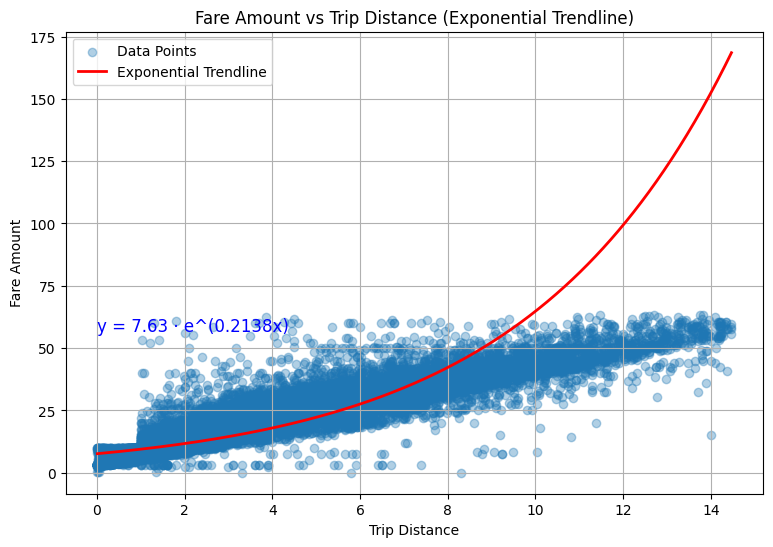

In [81]:
df = Trip_dataset_copy

# 1) keep only positive fare and distance
m = (df['fare_amount'] > 0) & (df['trip_distance'] > 0)
x = df.loc[m, 'trip_distance'].to_numpy()
y = df.loc[m, 'fare_amount'].to_numpy()

# 2) remove extreme outliers (top 1% by distance or fare)
x99, y99 = np.quantile(x, 0.99), np.quantile(y, 0.99)
m2 = (x <= x99) & (y <= y99)
x, y = x[m2], y[m2]

# 3) fit exp by linearizing: ln(y) = ln(a) + b x
b, log_a = np.polyfit(x, np.log(y), 1)
a = np.exp(log_a)

# 4) draw one smooth trendline
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = a * np.exp(b * x_fit)

plt.figure(figsize=(9,6))
plt.scatter(x, y, alpha=0.35, label='Data Points')
plt.plot(x_fit, y_fit, color='red', lw=2, label='Exponential Trendline')

eq = f'y = {a:.2f} · e^({b:.4f}x)'
plt.text(x.min(), y.max()*0.9, eq, color='blue', fontsize=12)

plt.title('Fare Amount vs Trip Distance (Exponential Trendline)')
plt.xlabel('Trip Distance'); plt.ylabel('Fare Amount'); plt.grid(True); plt.legend()
plt.show()

check which trendline is the best to use

Linear model:   y = 3.85x + 5.45, R² = 0.8679
Exponential model: y = 8.49 * e^(0.1703x), R² = -54507.5722


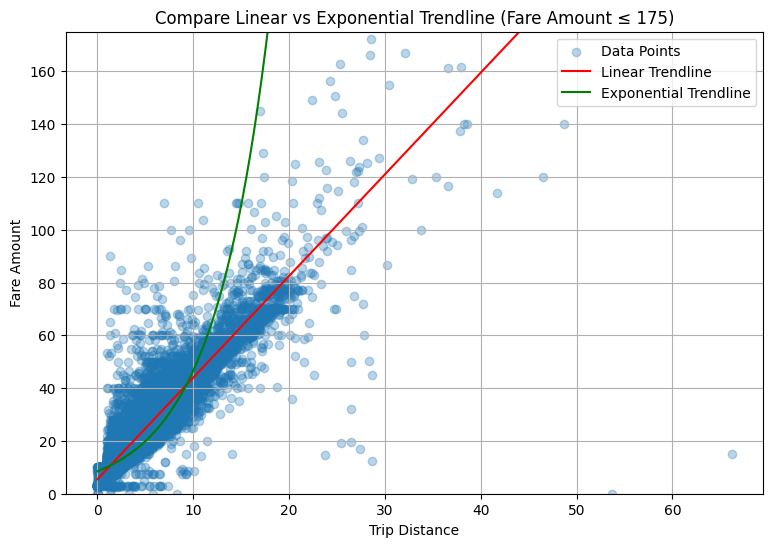

In [82]:
# --- 1. Filter data to Fare Amount <= 175 ---
df = Trip_dataset_copy
m = (df['fare_amount'] > 0) & (df['fare_amount'] <= 175) & (df['trip_distance'] > 0)
x = df.loc[m, 'trip_distance'].to_numpy()
y = df.loc[m, 'fare_amount'].to_numpy()

# --- 2. Fit Linear Trendline ---
linear_coeffs = np.polyfit(x, y, 1)   # slope & intercept
slope, intercept = linear_coeffs
y_pred_linear = slope * x + intercept
r2_linear = r2_score(y, y_pred_linear)

# --- 3. Fit Exponential Trendline ---
log_y = np.log(y)
exp_coeffs = np.polyfit(x, log_y, 1)  # log(y)=b*x+log(a)
b, log_a = exp_coeffs
a = np.exp(log_a)
y_pred_exp = a * np.exp(b * x)
r2_exp = r2_score(y, y_pred_exp)

print(f"Linear model:   y = {slope:.2f}x + {intercept:.2f}, R² = {r2_linear:.4f}")
print(f"Exponential model: y = {a:.2f} * e^({b:.4f}x), R² = {r2_exp:.4f}")

# --- 4. Plot both trendlines ---
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit_linear = slope * x_fit + intercept
y_fit_exp = a * np.exp(b * x_fit)

plt.figure(figsize=(9,6))
plt.scatter(x, y, alpha=0.3, label='Data Points')
plt.plot(x_fit, y_fit_linear, 'r-', label='Linear Trendline')
plt.plot(x_fit, y_fit_exp, 'g-', label='Exponential Trendline')
plt.title('Compare Linear vs Exponential Trendline (Fare Amount ≤ 175)')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.ylim(0, 175)  # Limit y-axis (Fare Amount) to 175
plt.grid(True)
plt.legend()
plt.show()

#### Summary
Because the linear trendline achieved an R² value close to 1 (0.848), it is considered the most reliable model for our data. This chosen trendline will then serve as a predictive tool to estimate how much customers are likely to pay for trips at different distances. By using this model, we can develop more precise pricing strategies, forecast revenue more accurately, and optimize operations to increase profitability

### 2. Check pick-up time distribution

In [83]:
Trip_dataset_copy["pickup_hour"] = Trip_dataset_copy["lpep_pickup_datetime"].dt.hour
Trip_dataset_copy

C:\Users\galih\AppData\Local\Temp\ipykernel_32224\4252718012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trip_dataset_copy["pickup_hour"] = Trip_dataset_copy["lpep_pickup_datetime"].dt.hour


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,tip_cov_tp,pickup_date,pickup_time,dropoff_date,dropoff_time,Fare/distance,pickup_hour
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,1.0,1.0,2.75,16.666667,2023-01-01,00:26:10,2023-01-01,00:37:11,5.775194,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,1.0,1.0,0.00,16.666667,2023-01-01,00:51:03,2023-01-01,00:57:49,5.911602,0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.0,1.0,0.00,16.666667,2023-01-01,00:13:14,2023-01-01,00:19:03,5.000000,0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.0,1.0,0.00,0.000000,2023-01-01,00:33:04,2023-01-01,00:39:02,5.454545,0
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,2.0,1.0,2.75,0.000000,2023-01-01,00:53:31,2023-01-01,01:11:04,6.366906,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,NaN,NaN,NaN,4.996003,2023-01-31,21:56:00,2023-01-31,22:14:00,5.285714,21
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,NaN,NaN,NaN,0.000000,2023-01-31,22:40:00,2023-01-31,22:48:00,2.060748,22
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,NaN,NaN,NaN,16.682510,2023-01-31,23:46:00,2023-02-01,00:02:00,4.805233,23
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,NaN,NaN,NaN,16.684046,2023-01-31,23:01:00,2023-01-31,23:19:00,4.943894,23


In [84]:
bins = [0,3,6,9,12,15,18,21,24]
labels = ["0-2","3-5","6-8","9-11","12-14","14-17","18-20","21-24"]

Trip_dataset_copy["hour_group"] = pd.cut(Trip_dataset_copy["pickup_hour"],bins=bins,labels=labels,right=False,include_lowest=True)
Trip_dataset_copy

C:\Users\galih\AppData\Local\Temp\ipykernel_32224\1449933997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trip_dataset_copy["hour_group"] = pd.cut(Trip_dataset_copy["pickup_hour"],bins=bins,labels=labels,right=False,include_lowest=True)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,tip_cov_tp,pickup_date,pickup_time,dropoff_date,dropoff_time,Fare/distance,pickup_hour,hour_group
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,1.0,2.75,16.666667,2023-01-01,00:26:10,2023-01-01,00:37:11,5.775194,0,0-2
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,1.0,0.00,16.666667,2023-01-01,00:51:03,2023-01-01,00:57:49,5.911602,0,0-2
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.0,0.00,16.666667,2023-01-01,00:13:14,2023-01-01,00:19:03,5.000000,0,0-2
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.0,0.00,0.000000,2023-01-01,00:33:04,2023-01-01,00:39:02,5.454545,0,0-2
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,1.0,2.75,0.000000,2023-01-01,00:53:31,2023-01-01,01:11:04,6.366906,0,0-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,NaN,NaN,4.996003,2023-01-31,21:56:00,2023-01-31,22:14:00,5.285714,21,21-24
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,NaN,NaN,0.000000,2023-01-31,22:40:00,2023-01-31,22:48:00,2.060748,22,21-24
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,NaN,NaN,16.682510,2023-01-31,23:46:00,2023-02-01,00:02:00,4.805233,23,21-24
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,NaN,NaN,16.684046,2023-01-31,23:01:00,2023-01-31,23:19:00,4.943894,23,21-24


In [85]:
group_counts = Trip_dataset_copy["hour_group"].value_counts().sort_index(ascending=True)
group_counts

hour_group
0-2       2451
3-5       1269
6-8       6419
9-11     10156
12-14    11361
14-17    14639
18-20    12069
21-24     5498
Name: count, dtype: int64

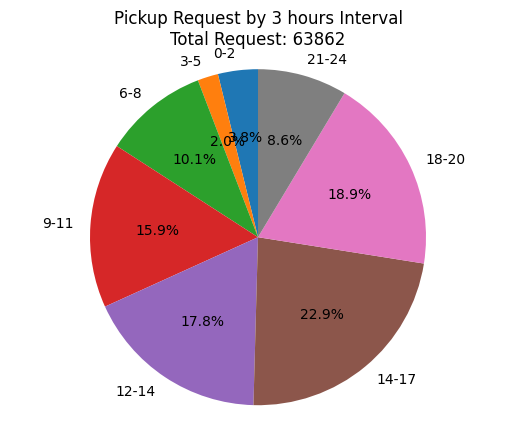

In [86]:
total_records = group_counts.sum()
plt.Figure(figsize=(8,8))
plt.pie(group_counts,labels=group_counts.index,autopct="%1.1f%%",startangle=90)
plt.title(f"Pickup Request by 3 hours Interval\nTotal Request: {total_records}")
plt.axis("equal")
plt.show()

Peak Demand Times

The chart shows the highest passenger requests occur between 14:00–17:00 (22.9%), followed by 18:00–20:00 (18.9%), and 12:00–14:00 (17.8%).

This indicates a clear afternoon-to-evening surge in demand, which aligns with commuter and after-work travel times.

Operational Optimization

Focus vehicle availability and driver allocation in the 12:00–20:00 window, ensuring that more cars are on the road during peak hours to capture as many requests as possible.

This approach will not only improve customer service but also directly boost the number of high-fare trips.

#### Summary

By combining peak-time fare adjustments and optimized vehicle allocation, the taxi operator can increase revenue per km while also capturing the largest share of daily demand.

### 3. Check distribution of passenger from pickup day

In [87]:
Trip_dataset_copy["pickup_date"] = pd.to_datetime(Trip_dataset_copy["pickup_date"])
Trip_dataset_copy

C:\Users\galih\AppData\Local\Temp\ipykernel_32224\1804749101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trip_dataset_copy["pickup_date"] = pd.to_datetime(Trip_dataset_copy["pickup_date"])


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,tip_cov_tp,pickup_date,pickup_time,dropoff_date,dropoff_time,Fare/distance,pickup_hour,hour_group
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,1.0,2.75,16.666667,2023-01-01,00:26:10,2023-01-01,00:37:11,5.775194,0,0-2
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,1.0,0.00,16.666667,2023-01-01,00:51:03,2023-01-01,00:57:49,5.911602,0,0-2
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.0,0.00,16.666667,2023-01-01,00:13:14,2023-01-01,00:19:03,5.000000,0,0-2
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.0,0.00,0.000000,2023-01-01,00:33:04,2023-01-01,00:39:02,5.454545,0,0-2
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,1.0,2.75,0.000000,2023-01-01,00:53:31,2023-01-01,01:11:04,6.366906,0,0-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,NaN,NaN,4.996003,2023-01-31,21:56:00,2023-01-31,22:14:00,5.285714,21,21-24
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,NaN,NaN,0.000000,2023-01-31,22:40:00,2023-01-31,22:48:00,2.060748,22,21-24
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,NaN,NaN,16.682510,2023-01-31,23:46:00,2023-02-01,00:02:00,4.805233,23,21-24
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,NaN,NaN,16.684046,2023-01-31,23:01:00,2023-01-31,23:19:00,4.943894,23,21-24


In [88]:
# add day column
Trip_dataset_copy["day_of_week"] = Trip_dataset_copy["pickup_date"].dt.day_name()
Trip_dataset_copy

C:\Users\galih\AppData\Local\Temp\ipykernel_32224\4127402471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trip_dataset_copy["day_of_week"] = Trip_dataset_copy["pickup_date"].dt.day_name()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,tip_cov_tp,pickup_date,pickup_time,dropoff_date,dropoff_time,Fare/distance,pickup_hour,hour_group,day_of_week
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,2.75,16.666667,2023-01-01,00:26:10,2023-01-01,00:37:11,5.775194,0,0-2,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.00,16.666667,2023-01-01,00:51:03,2023-01-01,00:57:49,5.911602,0,0-2,Sunday
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,0.00,16.666667,2023-01-01,00:13:14,2023-01-01,00:19:03,5.000000,0,0-2,Sunday
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.00,0.000000,2023-01-01,00:33:04,2023-01-01,00:39:02,5.454545,0,0-2,Sunday
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,2.75,0.000000,2023-01-01,00:53:31,2023-01-01,01:11:04,6.366906,0,0-2,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,NaN,3.92,20.72,...,NaN,4.996003,2023-01-31,21:56:00,2023-01-31,22:14:00,5.285714,21,21-24,Tuesday
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,NaN,0.000000,2023-01-31,22:40:00,2023-01-31,22:48:00,2.060748,22,21-24,Tuesday
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,NaN,16.682510,2023-01-31,23:46:00,2023-02-01,00:02:00,4.805233,23,21-24,Tuesday
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,NaN,16.684046,2023-01-31,23:01:00,2023-01-31,23:19:00,4.943894,23,21-24,Tuesday


In [89]:
Trip_dataset_copy['passenger_count'] = Trip_dataset_copy['passenger_count'].fillna(0).astype(int)

C:\Users\galih\AppData\Local\Temp\ipykernel_32224\2417449393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trip_dataset_copy['passenger_count'] = Trip_dataset_copy['passenger_count'].fillna(0).astype(int)


In [90]:
day_counts = Trip_dataset_copy.groupby("day_of_week")["passenger_count"].sum().reindex([
    "Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"
])

day_counts

day_of_week
Sunday        9843
Monday       11552
Tuesday      13145
Wednesday    11355
Thursday     11850
Friday       11883
Saturday      9888
Name: passenger_count, dtype: int64

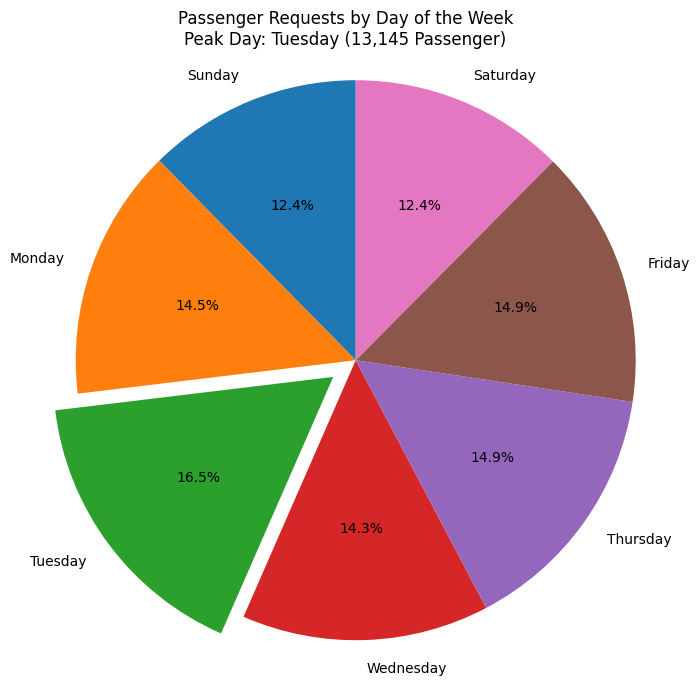

In [91]:
day_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
passenger_counts = [9843, 11552, 13145, 11355, 11850, 11883, 9888]

# Highlight (explode) the peak day: Tuesday (index 2)
explode = [0, 0, 0.1, 0, 0, 0, 0]  # Slightly pull out Tuesday slice

# Create pie chart
plt.figure(figsize=(8,8))
plt.pie(passenger_counts,
        labels=day_of_week,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode)
plt.title('Passenger Requests by Day of the Week\nPeak Day: Tuesday (13,145 Passenger)')
plt.axis('equal')  # Equal aspect ratio makes the pie a circle
plt.show()

#### Summary

* Tuesday is the peak day for passenger requests, accounting for about 16.5% of all trips (13,145 passenger).

* Sunday and Saturday are the lowest, with each contributing around 12.4% of the total trips.

* Weekdays (Monday to Friday) generally show higher passenger demand compared to weekends.

* Consistent demand from Monday to Friday suggests a strong commuter or work-related travel pattern.

* This trend indicates opportunities to focus promotions, surge pricing, or driver allocation on peak weekdays—especially Tuesday—to maximize revenue and efficiency.

### 4. Check the distribution of location to pick up

In [92]:
# check mode and mode counts
IQ_dataset

,q1,q2,q3,iqr,lowBoundIQ,highBoundIQ,mean,median,mode,mode_counts,min,max
VendorID,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.878447,2.000000,2,56102,1.000000,2.00000
RatecodeID,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.068409,1.000000,1.0,59087,1.000000,99.00000
PULocationID,74.000000,75.000000,116.000000,42.000000,11.000000,179.000000,97.380380,75.000000,74,12949,3.000000,265.00000
DOLocationID,74.000000,138.000000,223.000000,149.000000,-149.500000,446.500000,138.507398,138.000000,75,3378,1.000000,265.00000
passenger_count,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.325112,1.000000,1.0,50870,0.000000,8.00000
trip_distance,1.250000,1.960000,3.370000,2.120000,-1.930000,6.550000,2.854747,1.960000,1.4,639,0.010000,579.63000
fare_amount,9.300000,13.190000,19.800000,10.500000,-6.450000,35.550000,16.413337,13.190000,8.6,3115,0.010000,348.10000
extra,0.000000,0.000000,1.000000,1.000000,-1.500000,2.500000,0.864245,0.000000,0.0,37139,0.000000,12.50000
mta_tax,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.584005,0.500000,0.5,51740,0.000000,1.50000
tip_amount,0.000000,1.820000,3.410000,3.410000,-5.115000,8.525000,2.204112,1.820000,0.0,25835,0.000000,222.22000


In [93]:
# double check mode 74 with 12.949 order
Trip_dataset_copy.groupby("PULocationID").size().sort_values(ascending=False).head(5)

PULocationID
74     12949
75      8875
41      3910
166     3824
95      3656
dtype: int64

This is the top 5 Pick-up Location
| PULocationID | Borough   | Zone Name                                                  |
| ------------ | --------- | ---------------------------------------------------------- |
| **74**       | Manhattan | East Harlem North                                          |
| **75**       | Manhattan | East Harlem South                                          |
| **41**       | Manhattan | Upper East Side South                                      |
| **166**      | Manhattan | Morningside Heights                                        |
| **95**       | Queens    | Forest Hills                                               |

[1]: https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv?utm_source=chatgpt.com "taxi_zone_lookup.csv - Cloudfront.net"


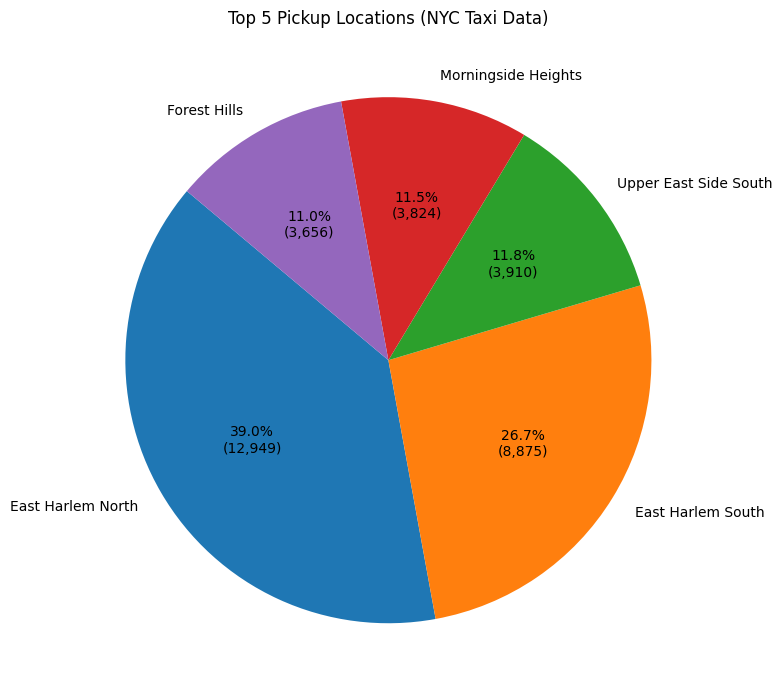

In [97]:
labels = [
    "East Harlem North",
    "East Harlem South",
    "Upper East Side South",
    "Morningside Heights",
    "Forest Hills"
]
sizes = [12949, 8875, 3910, 3824, 3656]

# Create labels only with percentages + counts for inside pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:,})'.format(p=pct,v=val)
    return my_autopct

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct=make_autopct(sizes), 
    startangle=140
)
plt.title('Top 5 Pickup Locations (NYC Taxi Data)')
plt.tight_layout()
plt.show()

#### Summary
High-Demand Zones: East Harlem North & South together make up ~66% of your pickups.

Action: Introduce surge pricing during peak hours (morning/evening commute times, Weekdays) in these areas. Even a 10–15% fare increase during high demand could boost total revenue while keeping wait times manageable.

### 5. Check the distribution of drop off location 

In [95]:
# See the data from mode and mode_counts
IQ_dataset

,q1,q2,q3,iqr,lowBoundIQ,highBoundIQ,mean,median,mode,mode_counts,min,max
VendorID,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.878447,2.000000,2,56102,1.000000,2.00000
RatecodeID,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.068409,1.000000,1.0,59087,1.000000,99.00000
PULocationID,74.000000,75.000000,116.000000,42.000000,11.000000,179.000000,97.380380,75.000000,74,12949,3.000000,265.00000
DOLocationID,74.000000,138.000000,223.000000,149.000000,-149.500000,446.500000,138.507398,138.000000,75,3378,1.000000,265.00000
passenger_count,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.325112,1.000000,1.0,50870,0.000000,8.00000
trip_distance,1.250000,1.960000,3.370000,2.120000,-1.930000,6.550000,2.854747,1.960000,1.4,639,0.010000,579.63000
fare_amount,9.300000,13.190000,19.800000,10.500000,-6.450000,35.550000,16.413337,13.190000,8.6,3115,0.010000,348.10000
extra,0.000000,0.000000,1.000000,1.000000,-1.500000,2.500000,0.864245,0.000000,0.0,37139,0.000000,12.50000
mta_tax,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.584005,0.500000,0.5,51740,0.000000,1.50000
tip_amount,0.000000,1.820000,3.410000,3.410000,-5.115000,8.525000,2.204112,1.820000,0.0,25835,0.000000,222.22000


In [96]:
# Double check whether DOLocationID 75 has 3.378 request
Trip_dataset_copy.groupby("DOLocationID").size().sort_values(ascending=False).head(5)

DOLocationID
75     3378
74     3257
236    2719
41     2536
238    2308
dtype: int64

| DOLocationID | Borough   | Zone Name                                                    |
| ------------ | --------- | ------------------------------------------------------------ |
| **75**       | Manhattan | East Harlem South                                            |
| **74**       | Manhattan | East Harlem North                                            |
| **236**      | Brooklyn  | Prospect Lefferts Gardens–Wingate (or similar; TLC zone 236) |
| **41**       | Manhattan | Upper East Side South                                        |
| **238**      | Brooklyn  | Prospect Park                                                |


#### Summary
1️⃣ Focus on the Two East Harlem Zones

Pickup:

East Harlem North (74) → 12,949 trips

East Harlem South (75) → 8,875 trips

Drop-off:

East Harlem South (75) → 3,378 trips

East Harlem North (74) → 3,257 trips

Recommendation:

These two zones are both high-volume origin and destination points.

Introduce bidirectional dynamic pricing:

Slightly higher base fare during peak times for trips starting or ending in East Harlem North/South.

Offer small discounts during off-peak to encourage steady demand.

Combine with driver bonuses in these areas to ensure enough supply.

# Overall Summary


* **Linear Trendline as Predictive Tool**
  The linear trendline with an R² of 0.848 is the most reliable model for estimating customer payments at various trip distances, helping create precise pricing strategies and revenue forecasts.

* **Peak Demand on Tuesday**
  Passenger demand peaks on Tuesday with about 16.5% of all trips, while Sunday and Saturday show the lowest demand at 12.4% each.

* **Weekday Travel Patterns**
  Consistent weekday demand (Monday–Friday) indicates a strong commuter or work-related travel pattern, making these days ideal for revenue-driving initiatives.

* **Operational Optimization**
  Allocating more vehicles and drivers during the 12:00–20:00 window can capture more high-fare trips and improve both revenue and customer satisfaction.

* **Promotion and Pricing Opportunities**
  Targeted promotions, surge pricing, and focused driver deployment on peak weekdays—especially Tuesday—will maximize revenue and operational efficiency.
